In [1]:
import os
import time

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)

In [3]:
otherwords={'hi','wealthfront','betterment','robo','roboadvisor','roboadvisors',
            'wealthfronts','happy','im','vs','thanks','like','love','yet','yeah','via','want','one','a','an','advisor',
            'advisors','dont','didnt','financial','investment','wealth','finance'}

otherwords=otherwords.union(set(gensim.parsing.preprocessing.STOPWORDS))

In [4]:
m=month('2017-06','2020-05')
root_path=os.getcwd()
category=os.listdir(root_path+'\\SentiStrength\\final')
category

['Bank Brokerage', 'Discount Brokerage', 'Full Brokerage', 'Robo Advisor']

In [5]:
# bug here
a=json.load(open('./SentiStrength/final/Bank Brokerage/BOA/BankofAmerica2017-06.json'))
cnt=0
for x,i in enumerate(a):
    if 'positive' not in i:
        cnt+=1
print(cnt,x)

1 4201


In [6]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                if j=='TDAmeritrade2017-07.json': 
                    temp.append([])
                if j=='Wealthfront2017-08.json':
                    temp.append([])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative']} for x in json.load(open(i[0]+'\\'+j))[:-1]])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)

In [7]:
#list(os.walk(root_path+'\\SentiStrength\\final\\Bank Brokerage'))

In [7]:
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [8]:
for i in metadata:
    print(len(i))

36
36
36
36


In [9]:
msdata=[]
temp=os.listdir(root_path+'\\SentiStrength\\final\\Full Brokerage\\Morgan_Stanley')
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\SentiStrength\\final\\Full Brokerage\\Morgan_Stanley\\'+i)))[:-1])

In [10]:
for i in msdata:
    print(len(i))

2128
2490
2768
2495
2421
2478
2383
2561
2218
2035
2125
2876
2599
2064
2144
2741
2094
1884
2459
1844
2045
2657
2296
2875
2645
1630
2030
2536
2127
2120
2055
2387
2238
2556
2489
2710


In [11]:
def subanalyze(data,keywords): # data hierarchy: months*(text,score)*piece
    pospolarity=[]
    negpolarity=[]
    freq=[]
    for k in data:
        pos=0
        neg=0
        count=0
        for i in k:
            for j in keywords:
                if j in i['text'].lower():
                    pos+=i['positive']
                    neg+=i['negative']
                    count+=1
                    break
        pospolarity.append(pos/max(1,count))
        negpolarity.append(neg/max(1,count))
        freq.append(count)
    return pospolarity,negpolarity,freq

def double(data,keyword_list):
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(m),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax1.set_ylabel('Positive')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax2.plot(m,app[1],color='C2')
    ax2.set_ylabel('Negative')
    ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()
    
def trend(data,hint,keyword_list): # hint=0 for pos, 1 for neg
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(m),app[hint],color='C'+str(hint+1))
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax2.bar(m,app[2],alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()
    
def all_trend(data,hint,keyword_list):
    app=[subanalyze(i,keyword_list) for i in data]
    matplotlib.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
    for i in range(2):
        for j in range(2):
            temp=2*i+j
            
            ax[i][j].plot(np.array(m),app[temp][hint],color='C'+str(hint+1))
            ax[i][j].set_xticks(np.arange(36))
            ax[i][j].set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            if not j:
                ax[i][j].set_ylabel('Sentiment Polarity')
            for t in ax[i][j].xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2 = ax[i][j].twinx()
            for t in ax2.xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax2.xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2.set_xticks(np.arange(36))
            ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            ax2.bar(m,app[temp][2],alpha=0.3)
            if j:
                ax2.set_ylabel('Sentiment Frequency')
            ax[i][j].set_title(category[temp])
    plt.suptitle('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()

def show(entity,month,keyword):
    a,b=0,0
    result=[]
    for i in metadata[entity][month]:
        s=0
        for j in keyword:
            if j in i['text'].lower():
                s=1
        if s:
            #print(i,data[entity][month][1][x])
            result.append(i)
    return sorted(result,key=lambda x : x['text'])

In [13]:
print(len(metadata[3][8]))

1864


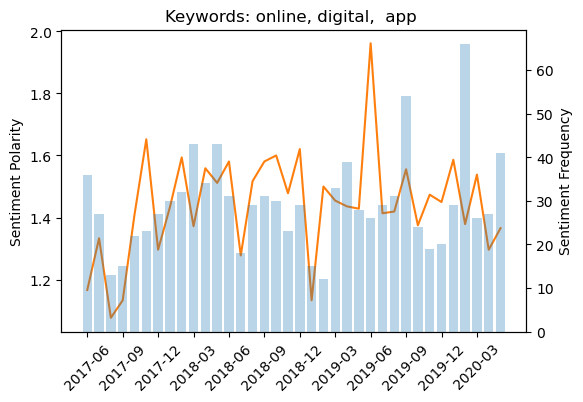

In [30]:
trend([[(j['text'],j['positive'],j['negative']) for j in i] for i in msdata],0,['online', 'digital',' app ',])

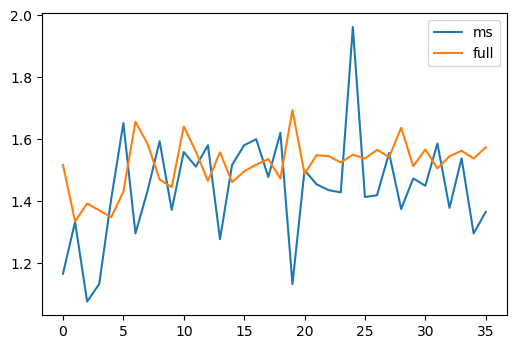

In [38]:
a=subanalyze([[(j['text'],j['positive'],j['negative']) for j in i] for i in msdata],['online', 'digital',' app ',])
b=subanalyze(metadata[0],['online', 'digital',' app ',])
plt.plot(a[0],label='ms')
plt.plot(b[0],label='full')
plt.legend()
plt.show()

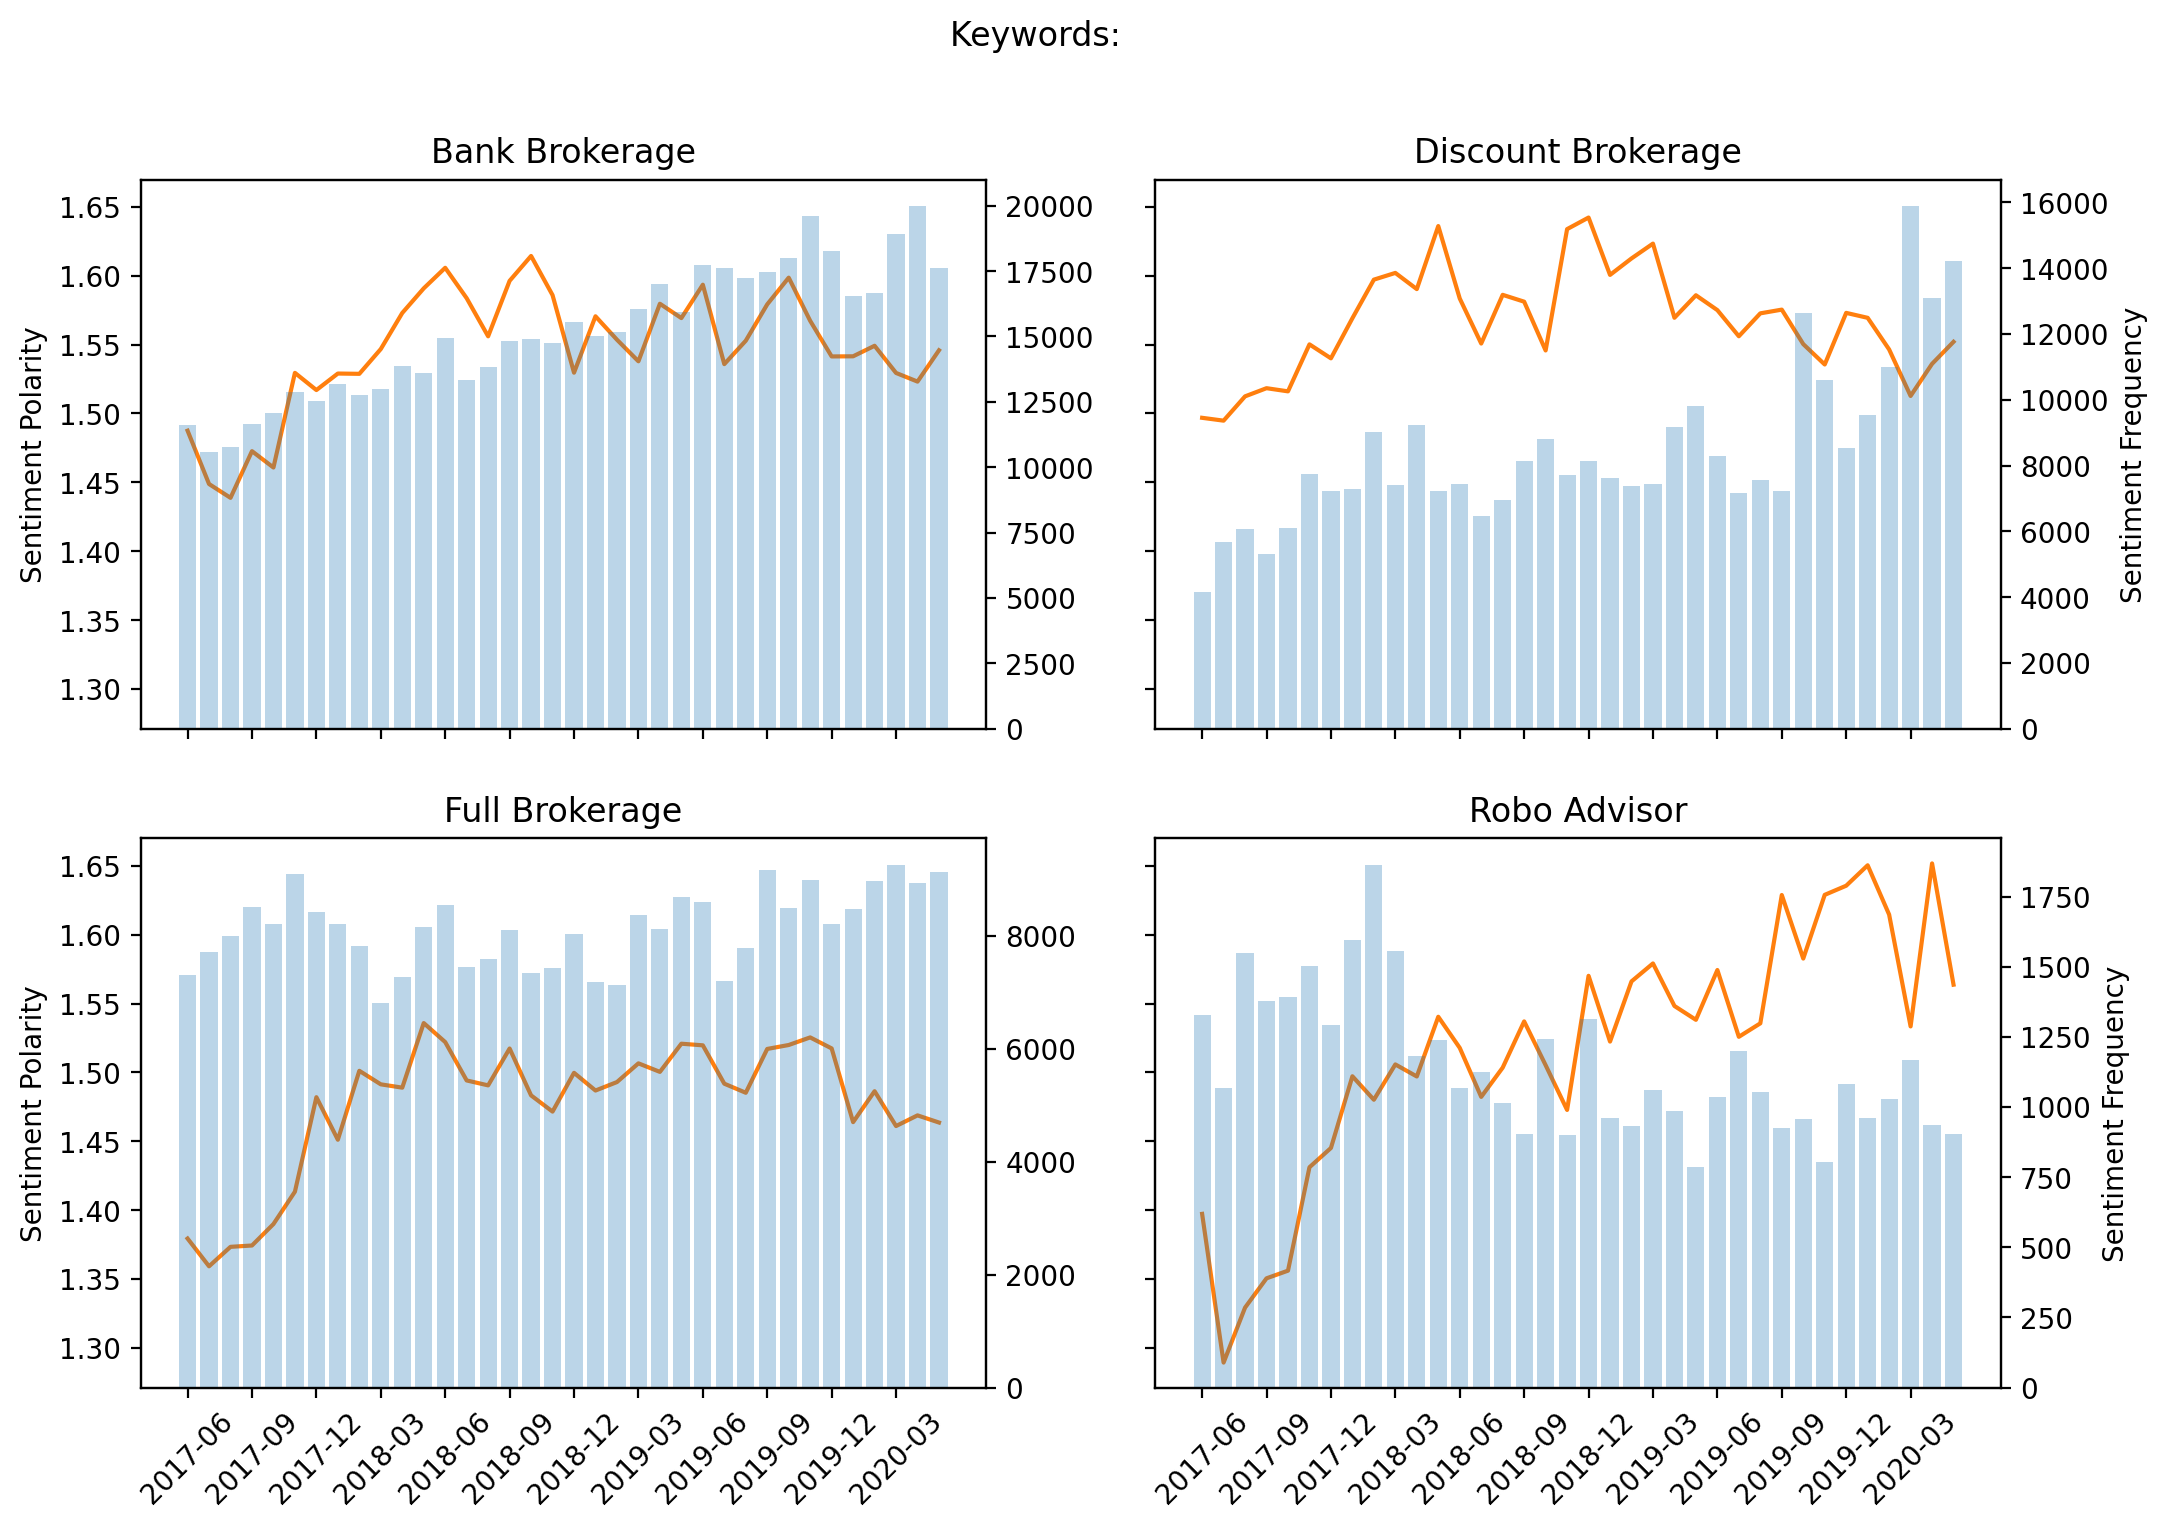

In [12]:
all_trend(metadata,0,[''])

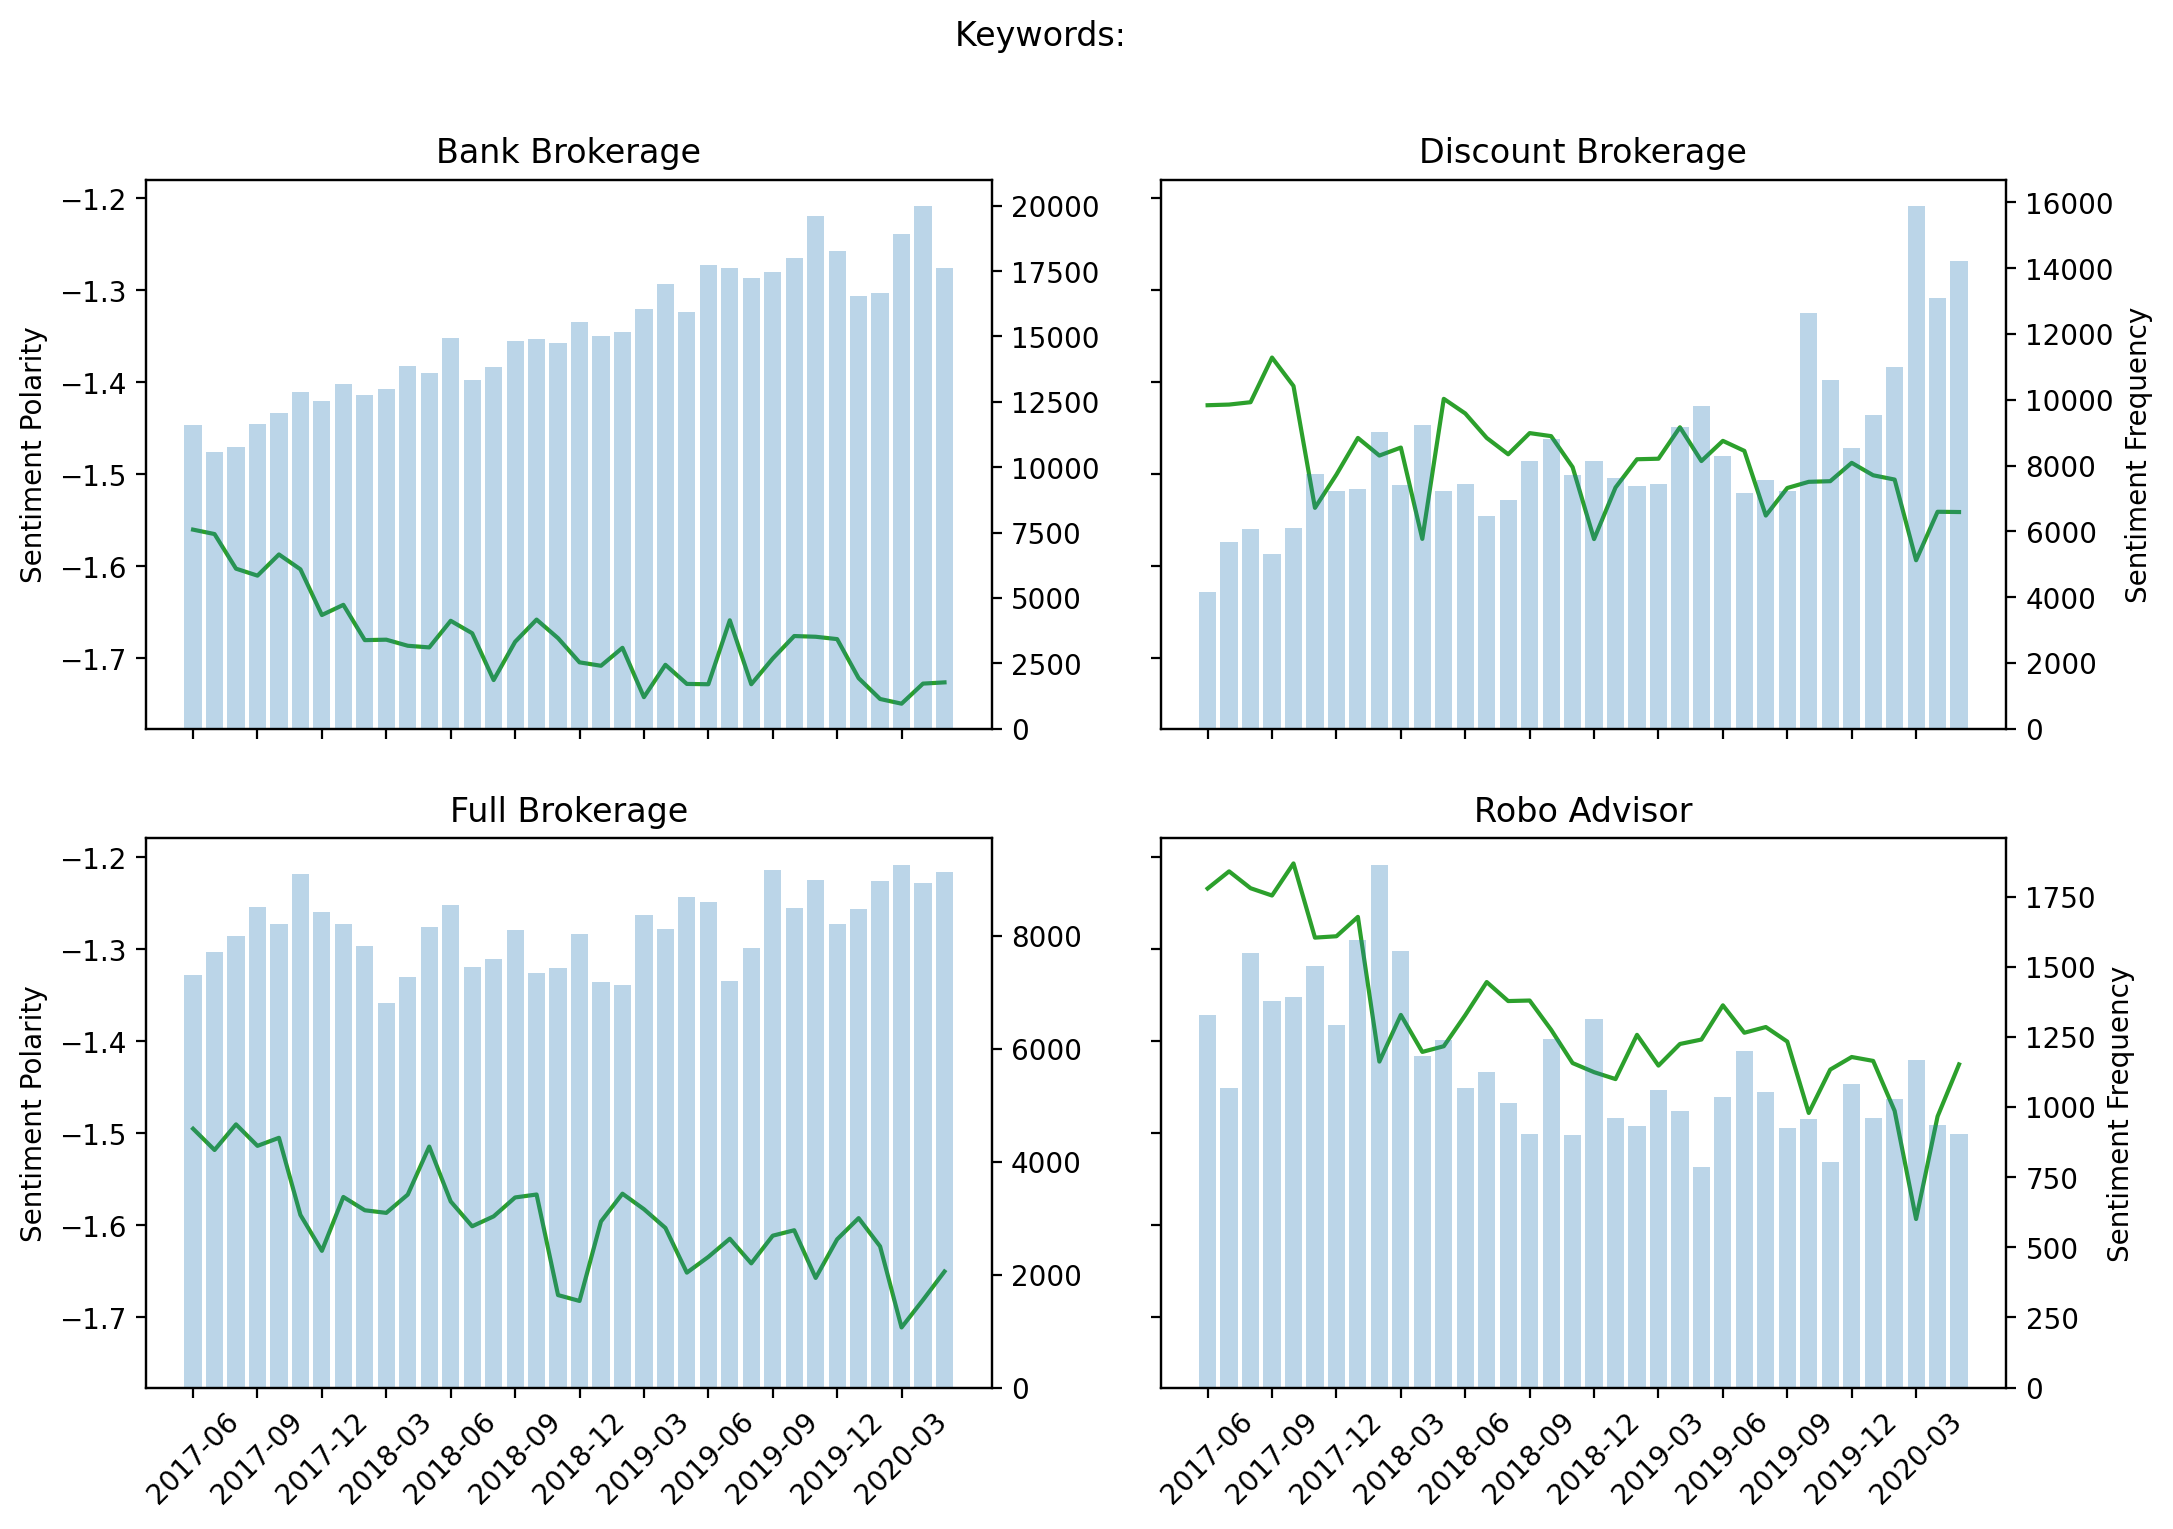

In [13]:
all_trend(metadata,1,[''])

In [15]:
for i in show(2,1,['']):
    if i['positive']>2 or i['negative']<-2:
        print(i)

{'text': '', 'positive': 1, 'negative': -4}
{'text': ' A national malaise to the extent that we needed a misery index  A time of such prosperity it was called the decade of greed', 'positive': 2, 'negative': -3}
{'text': ' Analyst Could Soon Hit  ', 'positive': 1, 'negative': -3}
{'text': ' Announces  Million Growth Investment by Morgan Stanley Expansion Capital Business Wire ', 'positive': 1, 'negative': -3}
{'text': ' Anyone know what a UBS is Thats Jason Ugly but sexy yeah Im tired drunk and cant sleep', 'positive': 3, 'negative': -3}
{'text': ' Australias super industry struggles to consolidate UBS Mesirow AXA on Korea Posts hedge fund manager shortlist Austral', 'positive': 3, 'negative': -2}
{'text': ' BUSINESS Goldman Sachs is s worstselling fund manager with  billion in outflows FT ', 'positive': 3, 'negative': -4}
{'text': ' DUBLIN CASTLE CAMDEN SEPTEMBER ST UBS XXX ', 'positive': 3, 'negative': -1}
{'text': ' EDITORS NOTE Tune In Now Great US UBS Teardown ', 'positive': 3, 'n

In [19]:
unique([(i['positive'],i['negative']) for i in metadata[2][1]])

[((1, -1), 3586, 46.52),
 ((1, -2), 1313, 17.03),
 ((2, -1), 999, 12.96),
 ((1, -3), 479, 6.21),
 ((3, -1), 362, 4.7),
 ((2, -2), 343, 4.45),
 ((1, -4), 195, 2.53),
 ((2, -3), 138, 1.79),
 ((3, -2), 96, 1.25),
 ((2, -4), 66, 0.86),
 ((3, -3), 56, 0.73),
 ((4, -1), 27, 0.35),
 ((3, -4), 18, 0.23),
 ((4, -2), 11, 0.14),
 ((1, -5), 6, 0.08),
 ((4, -3), 5, 0.06),
 ((4, -4), 2, 0.03),
 ((5, -3), 2, 0.03),
 ((5, -2), 2, 0.03),
 ((5, -1), 1, 0.01),
 ((5, -4), 1, 0.01)]

In [20]:
unique([(i['positive'],i['negative']) for i in metadata[2][2]])

[((1, -1), 3755, 46.92),
 ((1, -2), 1241, 15.51),
 ((2, -1), 1147, 14.33),
 ((1, -3), 477, 5.96),
 ((2, -2), 394, 4.92),
 ((3, -1), 366, 4.57),
 ((1, -4), 177, 2.21),
 ((2, -3), 163, 2.04),
 ((3, -2), 110, 1.37),
 ((2, -4), 55, 0.69),
 ((3, -3), 41, 0.51),
 ((4, -1), 34, 0.42),
 ((3, -4), 26, 0.32),
 ((2, -5), 3, 0.04),
 ((4, -2), 3, 0.04),
 ((1, -5), 2, 0.02),
 ((4, -3), 2, 0.02),
 ((4, -4), 2, 0.02),
 ((5, -1), 2, 0.02),
 ((3, -5), 1, 0.01),
 ((5, -4), 1, 0.01),
 ((4, -5), 1, 0.01)]

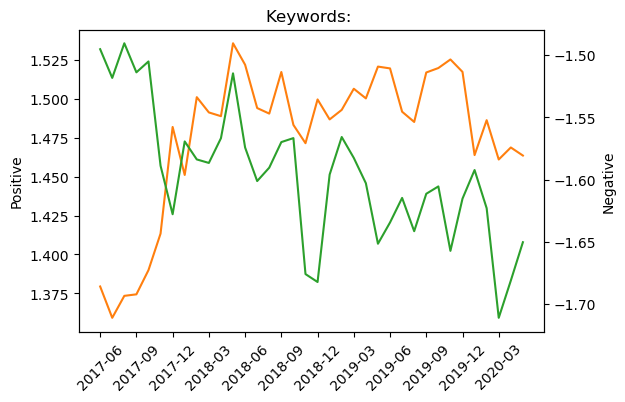

In [29]:
double(metadata[2],[''])

## MS

In [16]:
m=month('2017-06','2020-05')
m.index('2019-05')

23

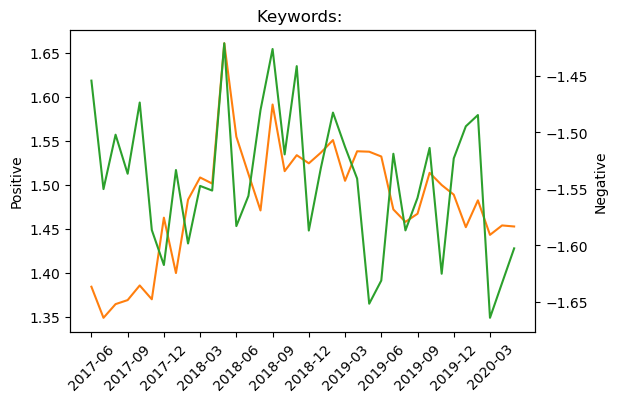

In [17]:
double(msdata,['']) # 1,4,5, 11(morgan stanley garden, justin rose), 23, -3

### Overall 1,11

In [40]:
sorted([(i['text'],i['likes']) for i in msdata[1]],key=lambda x: -x[1])

[('I got a job with Morgan Stanley', 404),
 ('Seriously This is a CuteEmergency wOfficialLivePD fan fav Sergeant Whittaker LivePdFans LivePDNation Thx MorganStanley ',
  220),
 ('Everything youve ever needed to know about John McCain Merrill Lynch Citigroup Goldman Sachs Morgan Stanley Bank of America GE ATT',
  95),
 ('I study my business a lot Apple Morgan Stanley Walmart and other big companies do the same Start treating your biz like a real business',
  85),
 ('SURE but world wants the US TO PAY FOR IT they get a FREE RIDE As a tax payer I say keep AMER dollars here for Americans',
  73),
 ('You should move to Louisiana I hear its totally not sinking into the ocean',
  59),
 ('Expanding women and girls access to the Internet Thats what women being tortured and abused need The frigging Internet Give me a break',
  55),
 ('Deflection is not a defense', 51),
 ('Bear in Air Deputy Alexander wa bear donated by MorganStanley during their ',
  51),
 ('Morgan Stanley predicts this will be 

In [37]:
NMF(msdata[1],10,7,{})

['"frankfurt" + "next" + "bank" + "via" + "goldman" + "morgan" + "stanley"',
 '"stanley" + "morgan" + "bitcoin" + "zero" + "virtually" + "shrinking" + "acceptance"',
 '"best" + "make" + "team" + "say" + "bank" + "via" + "morganstanley"',
 '"research" + "form" + "generation" + "renewables" + "power" + "new" + "cheapest"',
 '"scam" + "stop" + "hoax" + "country" + "global" + "change" + "climate"',
 '"billion" + "exclusive" + "source" + "italian" + "court" + "claim" + "hear"',
 '"cointelegraph" + "cryptocurrency" + "eye" + "vehicle" + "former" + "investment" + "ceo"',
 '"great" + "move" + "go" + "god" + "president" + "thank" + "trump"',
 '"morgan" + "pt" + "reiterated" + "price" + "overweight" + "rating" + "target"',
 '"real" + "impact" + "like" + "dont" + "money" + "good" + "get"']

In [41]:
NMF(msdata[11],10,7,{})

['"bank" + "stock" + "via" + "market" + "say" + "stanley" + "morgan"',
 '"therhs" + "morganstanley" + "best" + "chrisbeardshaw" + "show" + "nspcc" + "garden"',
 '"good" + "jr" + "deserved" + "chris" + "played" + "done" + "well"',
 '"donating" + "book" + "every" + "booktrustusa" + "made" + "eagle" + "morganstanley"',
 '"jacket" + "justinrose" + "golf" + "win" + "congrats" + "justin" + "great"',
 '"cash" + "competitor" + "fb" + "snap" + "lead" + "bank" + "ipo"',
 '"cut" + "raised" + "apple" + "tesla" + "tsla" + "price" + "target"',
 '"amazing" + "justin" + "team" + "many" + "deserved" + "chris" + "congratulation"',
 '"career" + "musk" + "earnings" + "analyst" + "unusual" + "call" + "year"',
 '"valuable" + "worth" + "disney" + "company" + "would" + "youtube" + "much"']

In [43]:
unique([(i['positive'],i['negative']) for i in msdata[1]])

[((1, -1), 1091, 43.82),
 ((1, -2), 477, 19.16),
 ((2, -1), 333, 13.37),
 ((1, -3), 189, 7.59),
 ((2, -2), 110, 4.42),
 ((3, -1), 105, 4.22),
 ((1, -4), 60, 2.41),
 ((2, -3), 40, 1.61),
 ((3, -2), 29, 1.16),
 ((2, -4), 18, 0.72),
 ((3, -3), 12, 0.48),
 ((4, -1), 8, 0.32),
 ((4, -2), 5, 0.2),
 ((3, -4), 5, 0.2),
 ((5, -3), 2, 0.08),
 ((5, -2), 2, 0.08),
 ((5, -4), 1, 0.04),
 ((4, -3), 1, 0.04),
 ((4, -4), 1, 0.04),
 ((1, -5), 1, 0.04)]

In [49]:
unique([(i['positive'],i['negative']) for i in msdata[11]])

[((1, -1), 1041, 36.2),
 ((3, -1), 455, 15.82),
 ((1, -2), 442, 15.37),
 ((2, -1), 438, 15.23),
 ((2, -2), 150, 5.22),
 ((1, -3), 113, 3.93),
 ((3, -2), 55, 1.91),
 ((2, -3), 48, 1.67),
 ((4, -1), 40, 1.39),
 ((1, -4), 29, 1.01),
 ((3, -3), 21, 0.73),
 ((2, -4), 21, 0.73),
 ((3, -4), 10, 0.35),
 ((4, -2), 6, 0.21),
 ((4, -3), 3, 0.1),
 ((5, -2), 2, 0.07),
 ((4, -5), 1, 0.03),
 ((4, -4), 1, 0.03)]

In [53]:
LDA([i for i in msdata[11] if i['positive']==3 and i['negative']==-1],10,7,{})

['0.025*"great" + 0.018*"good" + 0.015*"morgan" + 0.015*"stanley" + 0.015*"luck" + 0.010*"justin" + 0.008*"hope"',
 '0.013*"morganstanley" + 0.011*"morgan" + 0.011*"stanley" + 0.011*"last" + 0.010*"good" + 0.008*"well" + 0.008*"work"',
 '0.045*"great" + 0.023*"justinrose" + 0.022*"morganstanley" + 0.013*"thanks" + 0.010*"see" + 0.007*"stanley" + 0.007*"morgan"',
 '0.018*"morganstanley" + 0.013*"congrats" + 0.010*"multicultural" + 0.010*"morganstanleys" + 0.010*"innovation" + 0.010*"justinrose" + 0.009*"morgan"',
 '0.022*"morgan" + 0.022*"stanley" + 0.021*"beautiful" + 0.019*"morganstanley" + 0.018*"great" + 0.018*"time" + 0.015*"garden"',
 '0.040*"congratulation" + 0.022*"well" + 0.018*"chris" + 0.015*"morganstanley" + 0.013*"huge" + 0.012*"many" + 0.012*"deserved"',
 '0.024*"golf" + 0.024*"justin" + 0.024*"great" + 0.022*"fantastic" + 0.019*"win" + 0.018*"congrats" + 0.018*"awesome"',
 '0.017*"amazing" + 0.015*"need" + 0.013*"stanley" + 0.013*"morgan" + 0.012*"morganstanley" + 0.011*"

### Overall 4,5

In [54]:
unique([(i['positive'],i['negative']) for i in msdata[4]])

[((1, -1), 1157, 47.79),
 ((1, -2), 393, 16.23),
 ((2, -1), 312, 12.89),
 ((1, -3), 134, 5.53),
 ((3, -1), 126, 5.2),
 ((2, -2), 113, 4.67),
 ((2, -3), 48, 1.98),
 ((3, -2), 35, 1.45),
 ((1, -4), 32, 1.32),
 ((2, -4), 22, 0.91),
 ((4, -1), 16, 0.66),
 ((3, -3), 13, 0.54),
 ((3, -4), 12, 0.5),
 ((1, -5), 3, 0.12),
 ((4, -2), 2, 0.08),
 ((5, -2), 1, 0.04),
 ((5, -1), 1, 0.04),
 ((5, -4), 1, 0.04)]

In [55]:
unique([(i['positive'],i['negative']) for i in msdata[5]])

[((1, -1), 1027, 41.44),
 ((1, -2), 558, 22.52),
 ((2, -1), 266, 10.73),
 ((1, -3), 162, 6.54),
 ((2, -2), 135, 5.45),
 ((3, -1), 114, 4.6),
 ((2, -3), 55, 2.22),
 ((3, -2), 41, 1.65),
 ((1, -4), 41, 1.65),
 ((2, -4), 25, 1.01),
 ((3, -3), 19, 0.77),
 ((4, -1), 16, 0.65),
 ((3, -4), 10, 0.4),
 ((4, -2), 5, 0.2),
 ((1, -5), 2, 0.08),
 ((4, -3), 1, 0.04),
 ((2, -5), 1, 0.04)]

In [76]:
LDA([i for i in msdata[4] if i['positive']==1 and i['negative']==-2],10,7,{'morgan','stanley','morganstanley'})

['0.021*"bank" + 0.012*"u" + 0.009*"overweight" + 0.008*"hq" + 0.006*"around" + 0.006*"equalweight" + 0.006*"think"',
 '0.009*"way" + 0.008*"tax" + 0.008*"market" + 0.008*"done" + 0.006*"one" + 0.006*"man" + 0.006*"job"',
 '0.009*"wrong" + 0.009*"rate" + 0.007*"could" + 0.007*"many" + 0.007*"fed" + 0.005*"imf" + 0.005*"world"',
 '0.012*"people" + 0.008*"stanley" + 0.006*"world" + 0.006*"problem" + 0.006*"power" + 0.006*"client" + 0.006*"experience"',
 '0.018*"recruiting" + 0.011*"pact" + 0.010*"fake" + 0.010*"brokerage" + 0.009*"industry" + 0.009*"quits" + 0.008*"stock"',
 '0.021*"climate" + 0.019*"change" + 0.010*"one" + 0.008*"billion" + 0.008*"market" + 0.008*"dont" + 0.006*"share"',
 '0.009*"india" + 0.007*"u" + 0.006*"bank" + 0.006*"know" + 0.006*"weight" + 0.006*"m" + 0.005*"trump"',
 '0.020*"overweight" + 0.017*"r" + 0.014*"say" + 0.010*"share" + 0.009*"target" + 0.008*"broker" + 0.007*"get"',
 '0.013*"broker" + 0.012*"exit" + 0.010*"recruiting" + 0.008*"via" + 0.008*"protocol" 

In [59]:
LDA([i for i in msdata[5] if i['positive']==1 and i['negative']==-2],10,7,{'morgan','stanley','morganstanley'})

['0.012*"goldman" + 0.010*"say" + 0.009*"sachs" + 0.009*"amazon" + 0.007*"tax" + 0.007*"case" + 0.007*"risk"',
 '0.012*"cut" + 0.011*"could" + 0.011*"boom" + 0.011*"bust" + 0.011*"tax" + 0.010*"trump" + 0.010*"bank"',
 '0.008*"price" + 0.007*"wage" + 0.007*"tell" + 0.007*"banker" + 0.007*"oil" + 0.006*"tax" + 0.006*"need"',
 '0.018*"tax" + 0.011*"car" + 0.009*"u" + 0.007*"new" + 0.005*"one" + 0.005*"could" + 0.005*"get"',
 '0.020*"overweight" + 0.008*"inflation" + 0.008*"rating" + 0.008*"stanley" + 0.007*"target" + 0.007*"u" + 0.007*"buy"',
 '0.016*"car" + 0.012*"electric" + 0.011*"want" + 0.009*"get" + 0.009*"charge" + 0.009*"inflation" + 0.009*"tax"',
 '0.032*"protocol" + 0.030*"broker" + 0.025*"exit" + 0.018*"dangerous" + 0.017*"corbyn" + 0.017*"brexit" + 0.015*"hard"',
 '0.011*"government" + 0.011*"may" + 0.011*"collapse" + 0.010*"drop" + 0.008*"election" + 0.008*"ill" + 0.007*"market"',
 '0.008*"inflation" + 0.008*"low" + 0.008*"condition" + 0.005*"put" + 0.005*"financial" + 0.005

In [79]:
text(search([i for i in msdata[5] if i['positive']==1 and i['negative']==-2],['election']))

[' just told its investors that another general election towards the end of was likely once Mays Govt realised it could not secure the Brexit deal it wants the Conservative party began to fall apart opening the door to Labour taking power',
 'I voted Dem for years from Bill to Hillary in general election that is What a fool I was Never again Where were the Dems when Goldman was getting free reign from the Commodities Futures Trading Commission',
 'MORGAN STANLEY Mays government will collapse in triggering a fresh general election ',
 'MORGAN STANLEY Mays government will collapse in triggering a fresh general election via BIUKFinance',
 'MORGAN STANLEY Mays government will collapse in triggering a fresh general election via BIUKFinance January',
 'MORGAN STANLEY Theresa Mays government will collapse in triggering a fresh general election ',
 'Morgan Stanley has told investors that another general election towards the end of is likely once Theresa Mays government realises it cannot secur

In [57]:
for i in msdata[5]:
    if i['positive']==1 and i['negative']==-2:
        print(i['text'],'\n')

Well actually full employment is more of a statistical equation result and not that every single person has a job Stagnant wages are our fault We voted for fools by not voting 

Takes less patience to charge than to gas up since you plug and go at work shopping at home sleeping No flammable liquids no odor no dangerous fumes no tail pipe emissions no carbon monoxide risks 

BD Advisor Valuations To Compress As Morgan Stanley Withdrawal Unravels The Broker Protocol other Weekend Reading for Financial Planners Nov  

 I hear a rumor that Morgan Stanley will offer investment banking and brokerage services in China within a two year time frame 

Inflation as measured may be low but the cost of living is skyrocketing Maybe were not measuring the right things 

Barrons Health and Wealth Roundtable Four top advisors offer strategies for avoiding common pitfalls when planning for your postcareer years MorganStanley RBC HighTowerAdvsor 

UnNamed Sources alleged Steyer groped a Morgan Stanley co

### Overall 23,-3

In [81]:
unique([(i['positive'],i['negative']) for i in msdata[22]])

[((1, -1), 852, 37.11),
 ((1, -2), 389, 16.94),
 ((2, -1), 330, 14.37),
 ((2, -2), 185, 8.06),
 ((3, -1), 184, 8.01),
 ((1, -3), 108, 4.7),
 ((2, -3), 88, 3.83),
 ((3, -2), 58, 2.53),
 ((1, -4), 34, 1.48),
 ((4, -1), 21, 0.91),
 ((2, -4), 17, 0.74),
 ((3, -3), 12, 0.52),
 ((3, -4), 10, 0.44),
 ((4, -2), 5, 0.22),
 ((4, -3), 1, 0.04),
 ((5, -1), 1, 0.04),
 ((3, -5), 1, 0.04)]

In [80]:
unique([(i['positive'],i['negative']) for i in msdata[23]])

[((1, -1), 959, 33.36),
 ((1, -2), 492, 17.11),
 ((2, -1), 390, 13.57),
 ((1, -3), 267, 9.29),
 ((3, -1), 224, 7.79),
 ((2, -2), 188, 6.54),
 ((2, -3), 97, 3.37),
 ((3, -2), 84, 2.92),
 ((1, -4), 56, 1.95),
 ((4, -1), 29, 1.01),
 ((3, -3), 27, 0.94),
 ((2, -4), 25, 0.87),
 ((3, -4), 17, 0.59),
 ((4, -2), 9, 0.31),
 ((4, -3), 4, 0.14),
 ((1, -5), 3, 0.1),
 ((5, -1), 2, 0.07),
 ((4, -4), 1, 0.03),
 ((5, -2), 1, 0.03)]

In [83]:
LDA([i for i in msdata[23] if i['positive']==1 and i['negative']==-3],10,7,{'morgan','stanley','morganstanley'})

['0.010*"say" + 0.010*"tsla" + 0.008*"target" + 0.008*"stock" + 0.008*"m" + 0.007*"price" + 0.006*"trump"',
 '0.037*"war" + 0.034*"recession" + 0.033*"trade" + 0.025*"world" + 0.024*"push" + 0.019*"fullblown" + 0.016*"toward"',
 '0.008*"trade" + 0.008*"uschina" + 0.006*"stock" + 0.006*"loss" + 0.006*"buy" + 0.006*"volume" + 0.006*"top"',
 '0.010*"fired" + 0.009*"say" + 0.007*"tariff" + 0.007*"michael" + 0.007*"wu" + 0.007*"adviser" + 0.007*"new"',
 '0.022*"tesla" + 0.011*"analyst" + 0.010*"useless" + 0.010*"forecast" + 0.010*"wild" + 0.008*"time" + 0.008*"company"',
 '0.017*"uber" + 0.013*"ipo" + 0.011*"look" + 0.011*"lyft" + 0.009*"money" + 0.009*"underwriter" + 0.007*"client"',
 '0.020*"say" + 0.017*"easy" + 0.015*"hurting" + 0.015*"tesla" + 0.015*"thats" + 0.011*"brand" + 0.010*"saying"',
 '0.011*"tesla" + 0.009*"june" + 0.007*"tsla" + 0.007*"analyst" + 0.007*"money" + 0.007*"bank" + 0.007*"around"',
 '0.012*"tesla" + 0.011*"b" + 0.011*"market" + 0.008*"trade" + 0.008*"war" + 0.008*

In [89]:
text(search([i for i in msdata[23] if i['positive']==1 and i['negative']==-3],['tesla']))

[' How Wild Useless Are Tesla Analyst Forecasts Morgan Stanley Edition ',
 'Adam Jonas of Morgan Stanley in his note We note that a Tesla share price of would put Teslas equity market valuation approximately at parity with SpaceX',
 'Didnt we hear the same thing about the and AAPL a few years ago aztecs OJRenick MattRayTalk Morgan Stanley says its too easy to own a Tesla now and thats hurting the brand MS TSLA',
 'Elon Musk owns B TSLA stock Larry Ellison owns B George Soros B Mark Cuban B vs MS clown analyst Adam Jonas who sold his soul to the devil taking orders from MorganStanley Morgan Stanley We see who has the power TESLA does ',
 'Eroded Mindnumbing Miserable Musks weak track record of delivering on his promises Elon Musk Loads Up Tesla Stock But Carmaker Worst Enemy is Tesla Itself Morgan Stanley',
 'From Morgan Stanley says its too easy to own a Tesla now and thats hurting the brand via rEconomics ',
 'Hmmm Was that a Teslabranded mouse in the background',
 'How Wild Useless A

### Over -3

In [92]:
unique([(i['positive'],i['negative']) for i in msdata[-2]])

[((1, -1), 971, 39.01),
 ((1, -2), 437, 17.56),
 ((2, -1), 304, 12.21),
 ((2, -2), 180, 7.23),
 ((1, -3), 163, 6.55),
 ((3, -1), 136, 5.46),
 ((2, -3), 95, 3.82),
 ((1, -4), 57, 2.29),
 ((3, -2), 49, 1.97),
 ((2, -4), 27, 1.08),
 ((3, -3), 22, 0.88),
 ((3, -4), 18, 0.72),
 ((4, -1), 12, 0.48),
 ((4, -2), 7, 0.28),
 ((1, -5), 4, 0.16),
 ((4, -3), 3, 0.12),
 ((2, -5), 2, 0.08),
 ((3, -5), 1, 0.04),
 ((4, -4), 1, 0.04)]

In [90]:
unique([(i['positive'],i['negative']) for i in msdata[-3]])

[((1, -1), 892, 34.9),
 ((1, -2), 556, 21.75),
 ((2, -1), 355, 13.89),
 ((1, -3), 173, 6.77),
 ((2, -2), 166, 6.49),
 ((3, -1), 113, 4.42),
 ((2, -3), 92, 3.6),
 ((3, -2), 62, 2.43),
 ((1, -4), 52, 2.03),
 ((2, -4), 29, 1.13),
 ((3, -3), 24, 0.94),
 ((3, -4), 17, 0.67),
 ((4, -2), 7, 0.27),
 ((4, -1), 7, 0.27),
 ((4, -3), 5, 0.2),
 ((1, -5), 5, 0.2),
 ((2, -5), 1, 0.04)]

In [93]:
LDA([i for i in msdata[-3] if i['positive']==1 and i['negative']==-2],10,7,{'morgan','stanley','morganstanley'})

['0.017*"u" + 0.014*"coronavirus" + 0.009*"week" + 0.009*"next" + 0.009*"could" + 0.007*"look" + 0.007*"last"',
 '0.014*"overweight" + 0.012*"price" + 0.011*"target" + 0.010*"case" + 0.010*"market" + 0.009*"recession" + 0.009*"galactic"',
 '0.010*"price" + 0.008*"target" + 0.008*"share" + 0.007*"overweight" + 0.007*"sachs" + 0.006*"analyst" + 0.006*"group"',
 '0.011*"risk" + 0.009*"u" + 0.008*"economy" + 0.008*"drop" + 0.006*"bn" + 0.006*"believe" + 0.005*"q"',
 '0.054*"bank" + 0.023*"goldman" + 0.019*"sachs" + 0.017*"chase" + 0.015*"america" + 0.014*"well" + 0.014*"say"',
 '0.008*"million" + 0.008*"jobless" + 0.008*"claim" + 0.008*"oil" + 0.008*"recession" + 0.007*"forecast" + 0.006*"market"',
 '0.046*"recession" + 0.045*"global" + 0.025*"goldman" + 0.025*"declare" + 0.018*"case" + 0.014*"base" + 0.014*"sachs"',
 '0.029*"pt" + 0.013*"maintains" + 0.009*"overweight" + 0.008*"time" + 0.007*"low" + 0.007*"raised" + 0.006*"m"',
 '0.013*"global" + 0.011*"u" + 0.009*"lindy" + 0.008*"million

In [105]:
text(search([i for i in msdata[-3] if i['positive']==1 and i['negative']==-2],['oil']))

['ETEnergyworld Oil price fall a net negative for global economy Morgan Stanley ',
 'Is today the day I get to take a shot every time some wet wipe from Morgan Stanley says gardenvariety recession Spoiler alert theres no gardenvariety recession Theres always a cause',
 'Morgan Stanley Base Case Global Recession Now DJIA F SP F Nasdaq F DXY GOLD F OIL F USDJPY Important Final SM MoveHHEODEOW ',
 'Morgan Stanley Slashes Brent Oil Forecast To ',
 'Morgan Stanley further cut its oil price forecast now expecting Brent crude to average a barrel during the second quarter from a barrel earlier ',
 'Oil gas stocks rally after crude oil prices hit year low Morgan Stanley bullish on HPCL BPCL moneycontrolcom ',
 'Putting it all together we believe the cumulative decline in oil prices since the beginning of the year if sustained is enough to reduce real GDP growth by about to bp MorganStanley',
 'Ruchir Sharma Chief Global Strategist of Morgan Stanley on CNBC reallocate equity assets to markets th

### Extreme

In [14]:
def extreme(data):
    result=[]
    for i in data:
        if i['positive']>=4 or i['negative']<=-4:
            result.append(i)
    return result

In [15]:
extreme_data=[extreme(i) for i in msdata]

2017-06: 876191205893312512,innovation lab,870693133792694272,926549853622099968 <br>
2017-06 <br>
2017-06 <br>
2017-06 <br>


In [16]:
text(extreme_data[1])

[' MS stock price struggling close to the highest as crowd sentiment has been weakening Good results tom increasingly ',
 ' yrs of constant war all over the MiddleEast thousands of dead people StopLying What is lying doing for you',
 'Actually he saved America billions on globalist redistribution of wealth scam U people r disgrace to USA pushing propaganda to brainwash',
 'And it killed off everything even huge beasts will again',
 'And we were already headed for the Depression and unemployment due to Democratic actions prior to Republicans taking the wheel',
 'Apparently Morgan Stanley is sexist they think females are incompetent idiots',
 'Awards for Excellence Morgan Stanley reclaims the investment banking throne via Euromoney ',
 'Awe yes The struggle was fuckin real But this time I dont think we will see depression we will see corruption THE GREAT FALL OF USA',
 'Aww MS was looking forward to those kickbacks Sorry youll have to find other more creative ways to rape our economy now

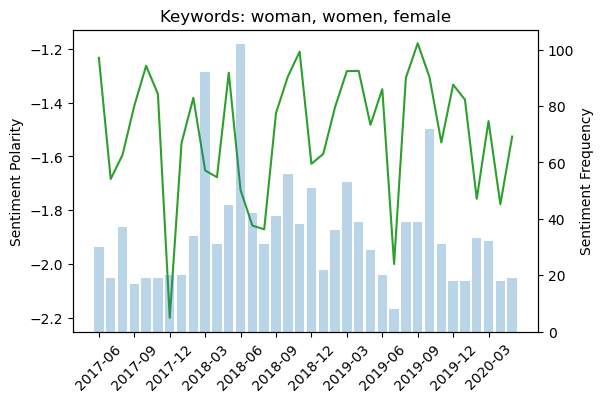

In [20]:
trend(msdata,1,['woman','women','female'])

In [18]:
for i in msdata:
    for j in i:
        if 'female' in j['text'].lower():
            print(j['text'])


Females are not victims Doesnt technology already allow this for everyone
Transforming access to capital for WOMEN creates growth Mo female directorspartners morganstanley lotoney 
Apparently Morgan Stanley is sexist they think females are incompetent idiots
I would love to hear this from your female CEO
Women are favored for loans over men Immigrants are favored over all Americans male or female
wow that female block to the internet hasnt been bypassed yet have they tried a vpn like tunnel bear
last time I checked MS All females within my household have accessgo fly a kite
Better you say Encouragement and Actively Showing Females Opportunities helps Better Their Lives Including Learning Technology Finances
I gained My Female Empowerment when was Truly PARENTS Family SUPPORTING THEIR CHILDREN with AMERICAN IDEALS RENAMED DEM POLITICAL BS
Interest reading such Do tell total All humans un Total female Total female execmgmt Total female board mbrs Total HR Complaints Harrassment Rape Sala

## Service model
### Keyword: experience

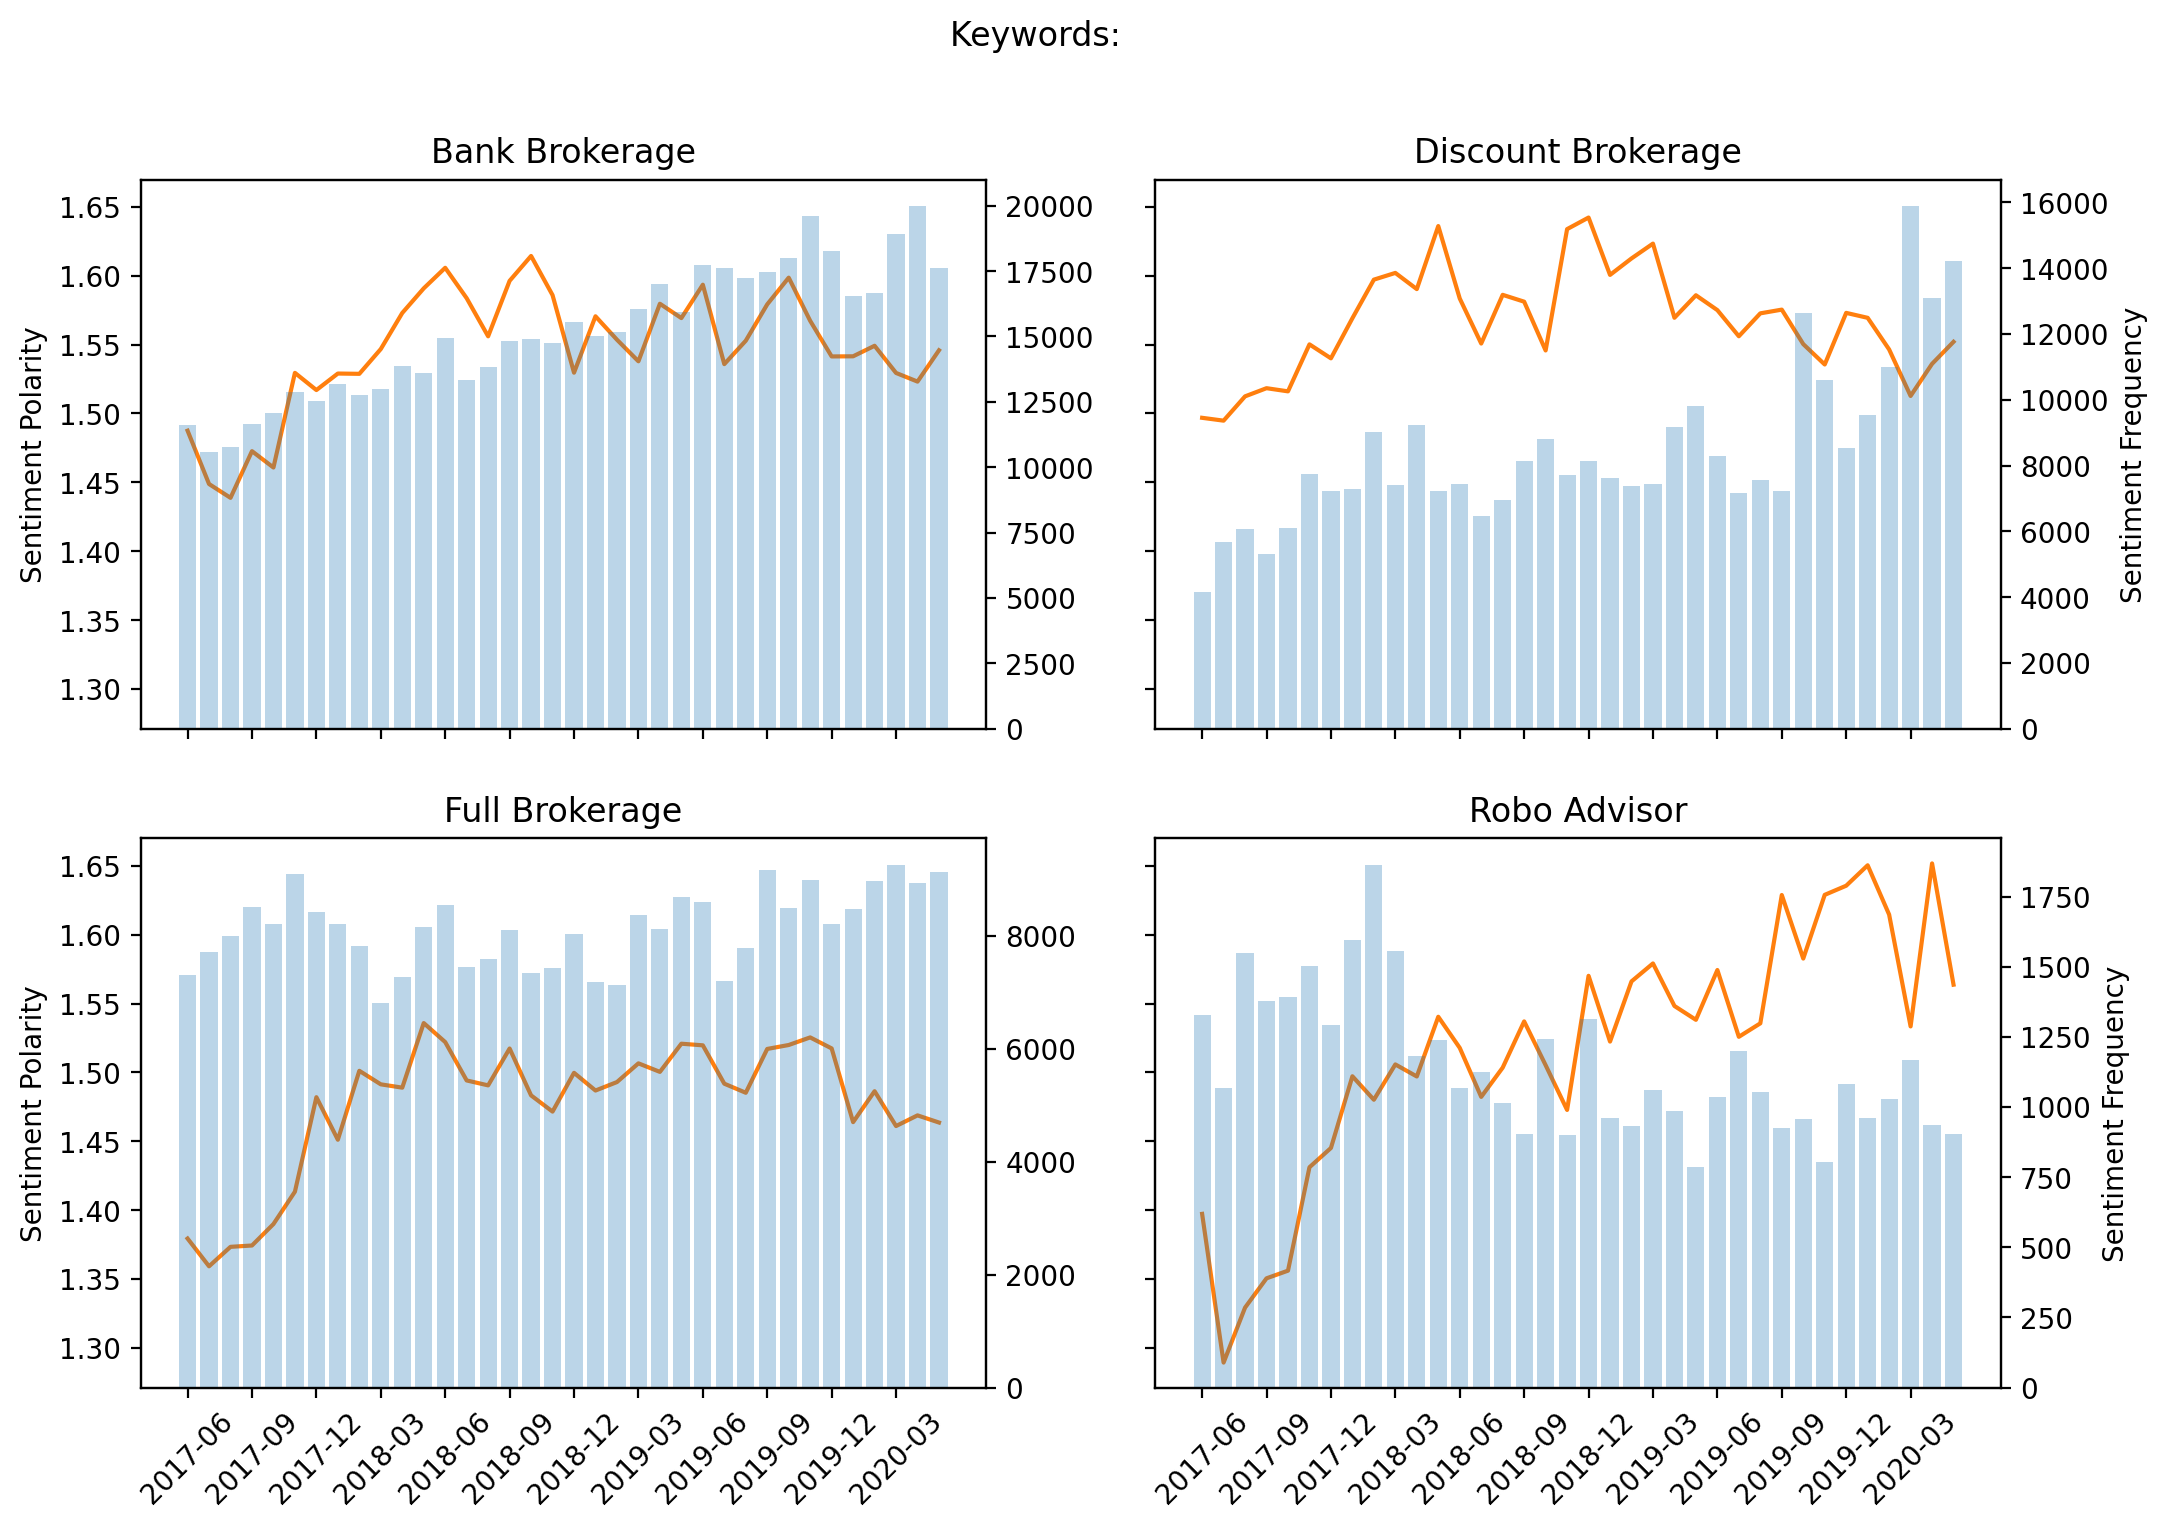

In [36]:
all_trend(metadata,0,[''])

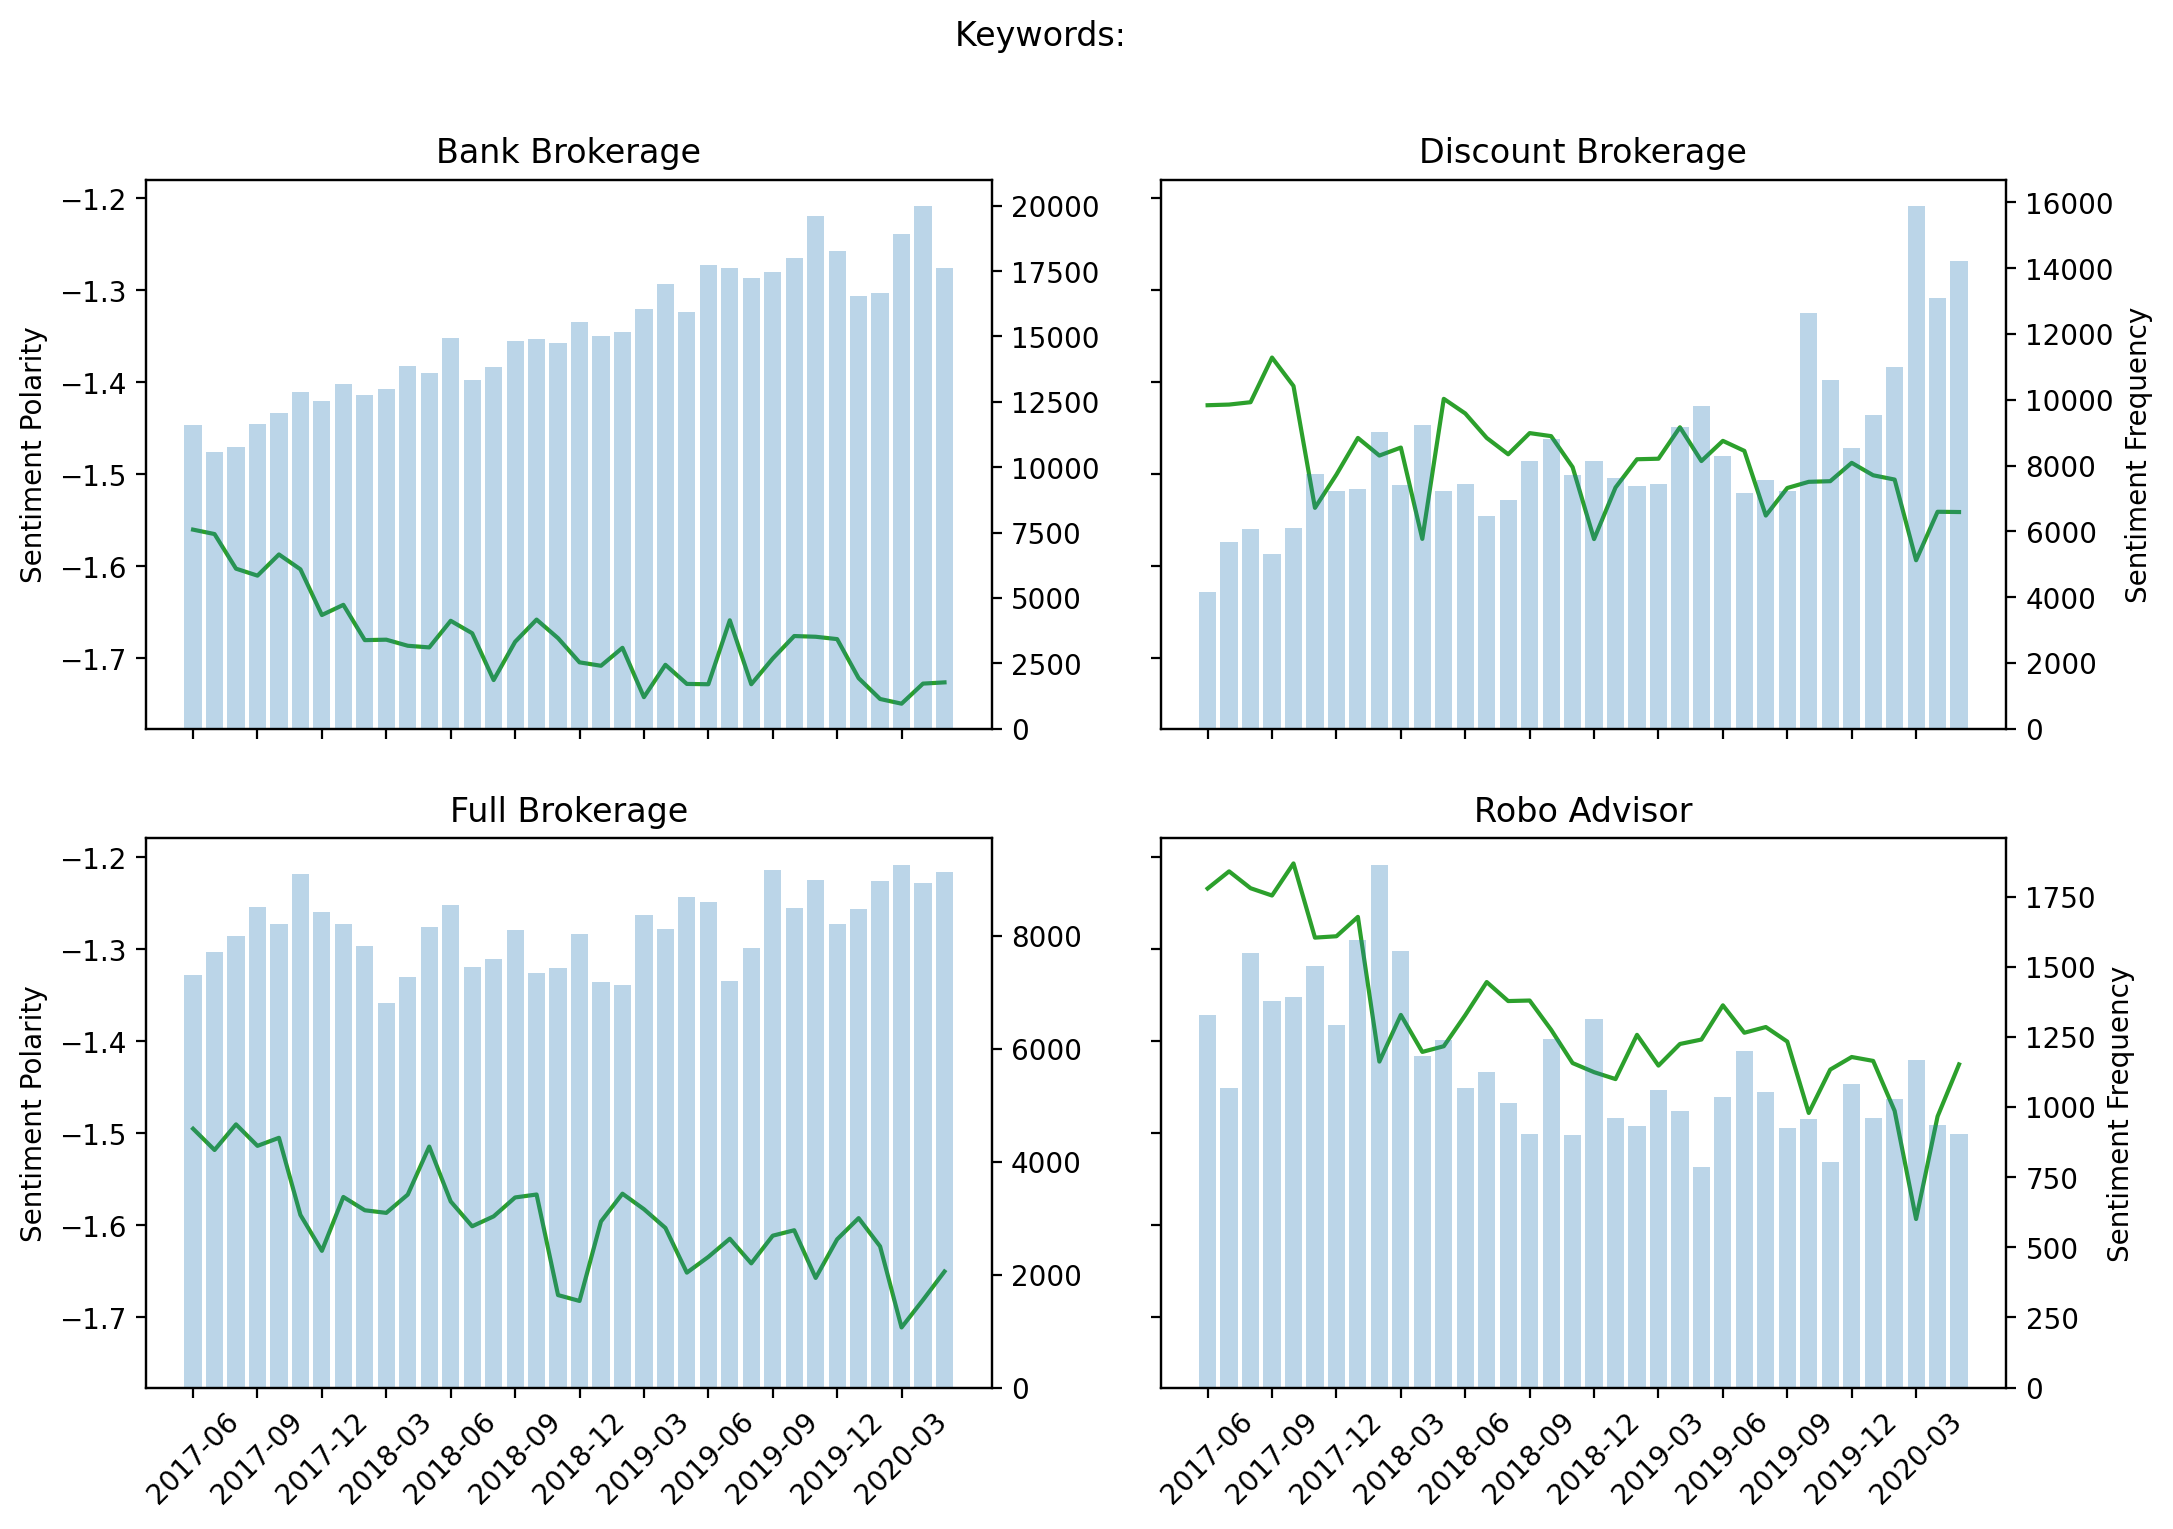

In [37]:
all_trend(metadata,1,[''])

In [45]:
LDA(metadata[3][1],10,7,{'wealthfront','robo','advisor','like','roboadvisor','roboadvisors','advisor'})

['0.012*"betterment" + 0.010*"u" + 0.010*"raise" + 0.010*"rise" + 0.009*"good" + 0.009*"million" + 0.008*"open"',
 '0.019*"personal" + 0.017*"capital" + 0.016*"review" + 0.016*"money" + 0.013*"fund" + 0.012*"one" + 0.011*"via"',
 '0.017*"digital" + 0.011*"via" + 0.010*"capital" + 0.009*"v" + 0.009*"advice" + 0.009*"financial" + 0.009*"first"',
 '0.030*"advisor" + 0.014*"advisory" + 0.014*"via" + 0.011*"advice" + 0.011*"betterment" + 0.010*"build" + 0.008*"investing"',
 '0.015*"advisor" + 0.015*"rt" + 0.014*"future" + 0.014*"sector" + 0.012*"ready" + 0.009*"use" + 0.008*"management"',
 '0.020*"personalcapital" + 0.020*"capital" + 0.020*"personal" + 0.019*"robinhoodapp" + 0.014*"investment" + 0.013*"betterment" + 0.012*"via"',
 '0.029*"advisor" + 0.026*"human" + 0.020*"personal" + 0.017*"capital" + 0.015*"via" + 0.012*"financial" + 0.010*"investing"',
 '0.014*"personal" + 0.014*"capital" + 0.010*"market" + 0.009*"bank" + 0.008*"personalcapital" + 0.007*"review" + 0.007*"fidor"',
 '0.016*

In [48]:
temp=[i for i in metadata[3][1] if i['positive']>=2]

In [62]:
other={'wealthfront','robo','advisor','like','roboadvisor','roboadvisors','advisor','u','robinhoodapp',
       'personalcapital','personal','capital','u','robinhood','v','betterment'}
LDA(temp,10,7,other)

['0.021*"support" + 0.017*"ever" + 0.017*"integration" + 0.017*"u" + 0.017*"know" + 0.017*"brokersroboadvisors" + 0.017*"think"',
 '0.014*"good" + 0.011*"fund" + 0.011*"want" + 0.011*"value" + 0.011*"cant" + 0.011*"stop" + 0.011*"rise"',
 '0.026*"best" + 0.015*"thanks" + 0.011*"good" + 0.008*"finance" + 0.008*"look" + 0.008*"new" + 0.008*"see"',
 '0.019*"please" + 0.019*"best" + 0.019*"v" + 0.019*"mint" + 0.015*"support" + 0.015*"add" + 0.015*"work"',
 '0.016*"account" + 0.010*"v" + 0.010*"advisor" + 0.010*"much" + 0.010*"support" + 0.010*"im" + 0.007*"plan"',
 '0.020*"good" + 0.017*"advisor" + 0.014*"financial" + 0.010*"great" + 0.010*"account" + 0.010*"interesting" + 0.010*"plus"',
 '0.019*"support" + 0.013*"advisor" + 0.010*"good" + 0.010*"u" + 0.010*"much" + 0.007*"year" + 0.007*"advice"',
 '0.021*"advisor" + 0.018*"would" + 0.014*"good" + 0.014*"money" + 0.011*"via" + 0.011*"fee" + 0.011*"account"',
 '0.023*"please" + 0.017*"love" + 0.010*"look" + 0.010*"think" + 0.010*"get" + 0.0

In [209]:
LDA([i for i in metadata[3][11] if i['positive']>=2],10,7,other)

['0.013*"advisor" + 0.010*"great" + 0.010*"good" + 0.009*"also" + 0.009*"best" + 0.009*"one" + 0.009*"investor"',
 '0.010*"people" + 0.010*"would" + 0.009*"help" + 0.008*"advisor" + 0.008*"dont" + 0.006*"thanks" + 0.006*"investing"',
 '0.012*"advisor" + 0.009*"great" + 0.009*"best" + 0.008*"human" + 0.008*"fund" + 0.008*"money" + 0.008*"want"',
 '0.011*"one" + 0.009*"digital" + 0.008*"new" + 0.008*"able" + 0.008*"well" + 0.007*"pretty" + 0.006*"dashboard"',
 '0.009*"get" + 0.008*"see" + 0.008*"account" + 0.007*"support" + 0.006*"really" + 0.006*"cost" + 0.006*"security"',
 '0.016*"advisor" + 0.009*"money" + 0.009*"via" + 0.007*"spend" + 0.007*"account" + 0.007*"best" + 0.006*"financial"',
 '0.009*"use" + 0.008*"investment" + 0.007*"fee" + 0.007*"month" + 0.006*"money" + 0.006*"fund" + 0.006*"finance"',
 '0.014*"client" + 0.008*"advisor" + 0.008*"fee" + 0.007*"support" + 0.007*"financial" + 0.005*"run" + 0.005*"technology"',
 '0.008*"need" + 0.008*"investing" + 0.006*"best" + 0.006*"cha

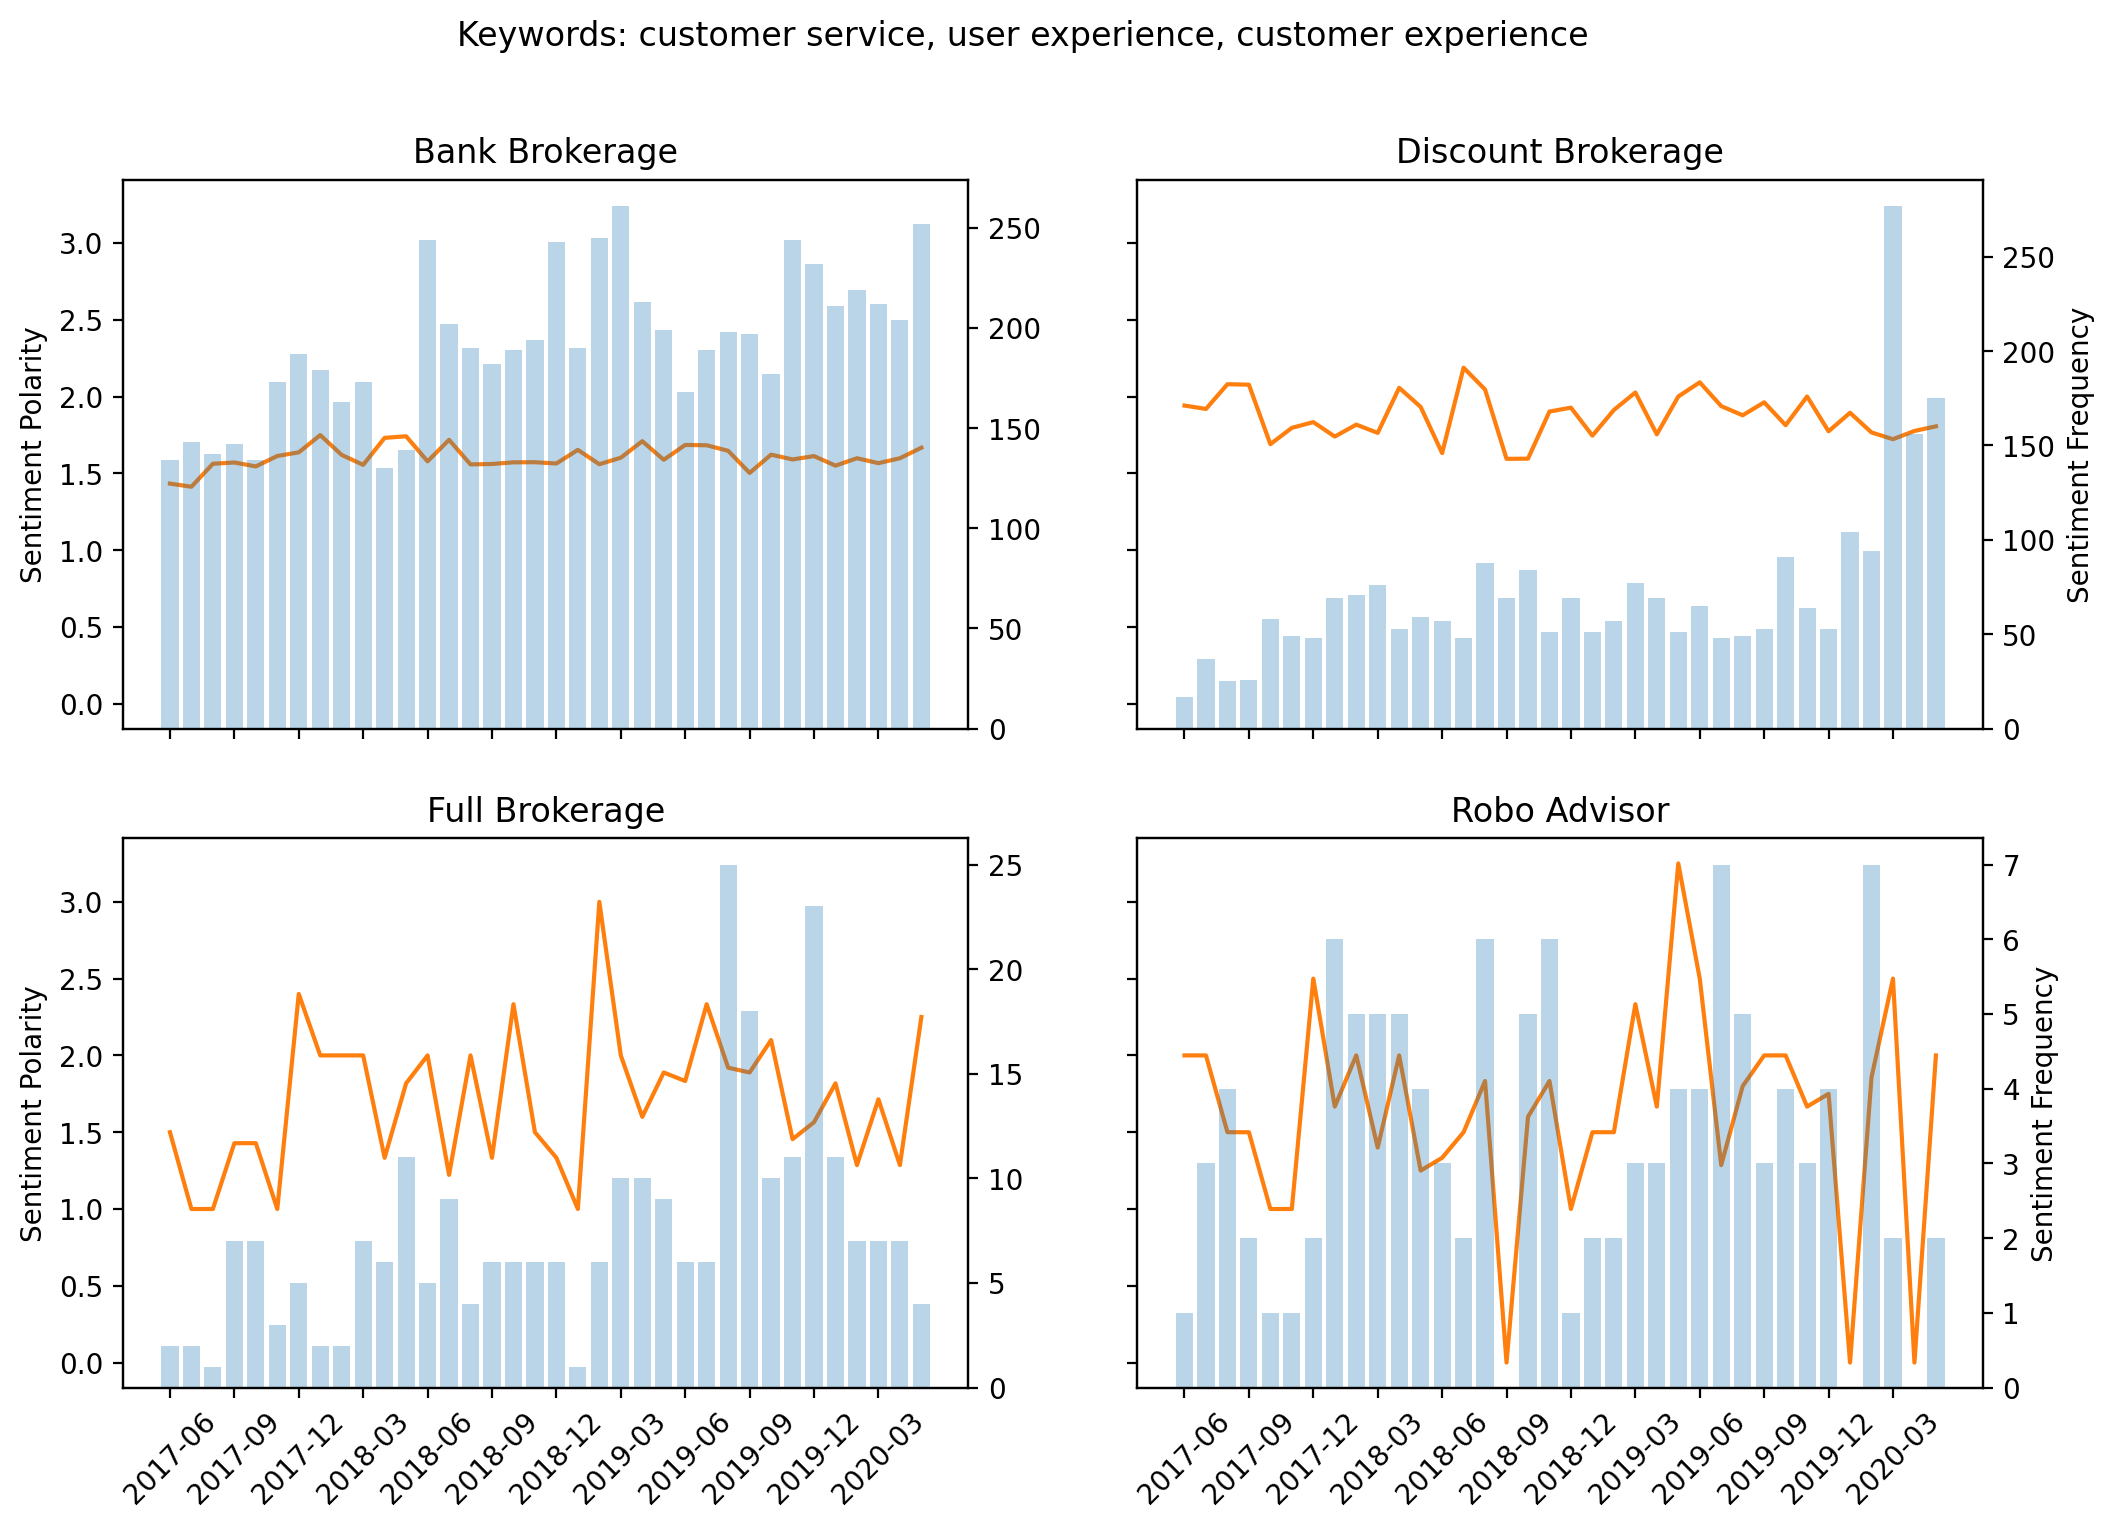

In [157]:
service=['customer service','user experience','customer experience','online experience','client service','client support',
         'customer support','client experience']
all_trend(metadata,0,service)

In [211]:
#all_trend(metadata,1,service)

### LDA

In [219]:
NMF(search(metadata[1][12],service),10,10,{})

['"investment" + "man" + "online" + "call" + "year" + "etrade" + "irate" + "suit" + "time" + "called"',
 '"stay" + "question" + "cant" + "away" + "feel" + "really" + "company" + "get" + "wanted" + "account"',
 '"information" + "call" + "time" + "center" + "phone" + "looking" + "support" + "help" + "robinhoodapp" + "number"',
 '"answer" + "responsible" + "asking" + "idzik" + "associate" + "paul" + "twice" + "joke" + "different" + "etrade"',
 '"future" + "im" + "free" + "guy" + "chat" + "week" + "call" + "rep" + "best" + "charlesschwab"',
 '"didnt" + "send" + "problem" + "pay" + "good" + "thank" + "etrade" + "lot" + "got" + "great"',
 '"response" + "havent" + "support" + "different" + "tdameritrade" + "worst" + "nothing" + "trade" + "issue" + "yesterday"',
 '"free" + "long" + "respond" + "bullshit" + "take" + "cant" + "email" + "phone" + "askrobinhood" + "robinhood"',
 '"worst" + "offer" + "away" + "tdameritrade" + "used" + "price" + "long" + "fidelity" + "never" + "make"',
 '"contact" +

In [220]:
NMF(search(metadata[1][13],service),10,10,{})

['"phone" + "time" + "pleased" + "support" + "rep" + "get" + "chat" + "tdameritrade" + "ive" + "im"',
 '"recently" + "response" + "chat" + "fee" + "platform" + "use" + "awesome" + "theyre" + "etrade" + "great"',
 '"create" + "call" + "shape" + "data" + "center" + "ameritrade" + "experience" + "client" + "advisor" + "td"',
 '"via" + "transfer" + "let" + "option" + "awesome" + "hr" + "sending" + "much" + "support" + "robinhoodapp"',
 '"hey" + "brokerage" + "people" + "tdameritrade" + "last" + "love" + "randomly" + "night" + "wrote" + "guy"',
 '"calling" + "account" + "client" + "looking" + "like" + "specialist" + "hiring" + "check" + "charles" + "schwab"',
 '"thats" + "live" + "robinhood" + "business" + "excellent" + "broker" + "complaint" + "go" + "site" + "better"',
 '"looking" + "helpful" + "brokerage" + "hey" + "taking" + "made" + "worse" + "make" + "day" + "trade"',
 '"way" + "also" + "country" + "house" + "update" + "use" + "charlesschwab" + "resolve" + "week" + "sent"',
 '"yet" + 

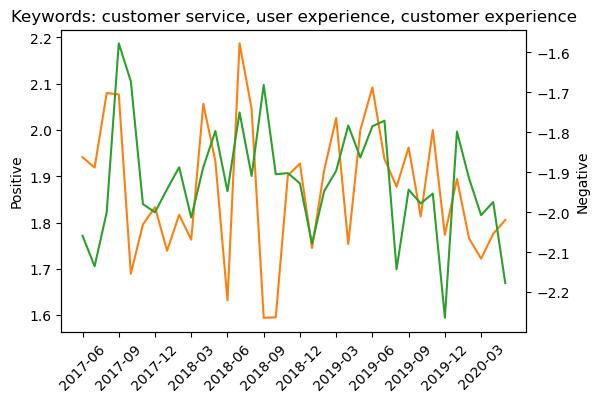

In [225]:
double(metadata[1],service)

In [244]:
for i in range(36): # good: charles schwab; bad: td, robinhood
    print(text(extreme(search(metadata[1][i],service))))
    print()

['CharlesSchwab has excellent customer service', 'Its a shame that jonnajarian and petenajarian sold Trade Monster to etrade The customer service is now horrendous', 'SunTrust HORRIBLE customer service Changing everything to Charles Schwab after yrs banking w SunTrust after this', 'no worries i finally got a good customer service guy in denver thats gonna double check on me', 'tyhall Stocktwits I like Interactive brokers Cheap but excellent execution Customer service could be better though']

['CharlesSchwab I hate your hold entertainment but your overthephone customer service is wonderful cc Tracy in Indianapolis ', 'TERRIBLE CUSTOMER SERVICE at scamhood too', 'Their customer support is honestly terrible too Super slow and unresponsive', 'etrade HORRIBLE EXPERIENCE TODAY WITH THE PLATFORM NO CUSTOMER SERVICE AND STILL HAVING PROBLEMS  MINUTES INTO SESSION', 'etrade ur customer service is appalling Ur leaving msgs wout enuf info NOT HELPFUL Why', 'horrible customer service', 'tyhall St

['I agree completely You can be guaranteed terrible customer service and average tools JP Morgan will have a tough time competing with TD Ameritrade Schwab Interactive Brokers', 'Just shoot them my way but knwo that i no longer recommend RobinhoodApp to anyone due to their horrendous customer service im switching to TDAmeritrade']

['CharlesSchwab I am a longtime Schwab customer and Im having a long extremely frustrating and deeply disappointing experience with Charles Schwab customer service Can someone with common sense intervene', 'Investing is scary when the company that holds your investment doesnt have a phone number or customer support', 'It has been over a week since Im trying to get a response from customer service regarding my funds that are withheld for no reason Very frustrated', 'RobinhoodApp Terrible customer service Email only and take days to respond ', 'RobinhoodApp Your customer service is terrible', 'Seriously looked into moving my account to TDAmeritrade but your cu

['CharlesSchwab I opened an account with you last week and plan to close it as soon as I can get my money out Your customer service is abhorrent', 'I am dreading the merger if I loss the site and customer service I am familiar with Have used Merrill lynch and Edward Jones in the past Settled at Ameritrade years ago and have never hade a compliant Love it', 'It would be a huge mistake to voluntarily switch from TD to Schwab In technology customer support RIA support fixed income and trade execution TD Ameritrade is  times better than Schwab Schwab is awful', 'Its a good step forward that RobinhoodApp is adding DRIP Dividend Reinvestment Plan and fractional shares but what really needs fixing is your customer service Not having a human to call is really frustrating and the core reason why I moved to CharlesSchwab', 'Its a good step forward that RobinhoodApp is adding DRIP Dividend Reinvestment Plan and fractional shares but what really needs fixing is your customer service Not having a h

In [246]:
def classify(monthdata):
    pos=[]
    neg=[]
    for i in monthdata:
        poscnt=0
        negcnt=0
        for k in i:
            if k['positive']>=-1.5*k['negative']:
                poscnt+=1
            elif -k['negative']>=1.5*k['positive']:
                negcnt+=1
        pos.append(poscnt/len(i))
        neg.append(negcnt/len(i))
    return pos,neg

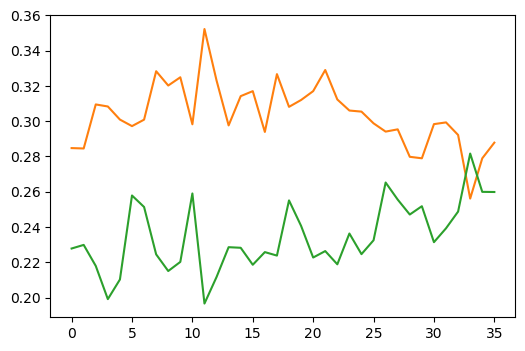

In [248]:
plt.plot(classify(metadata[1])[0],color='C1')
plt.plot(classify(metadata[1])[1],color='C2')

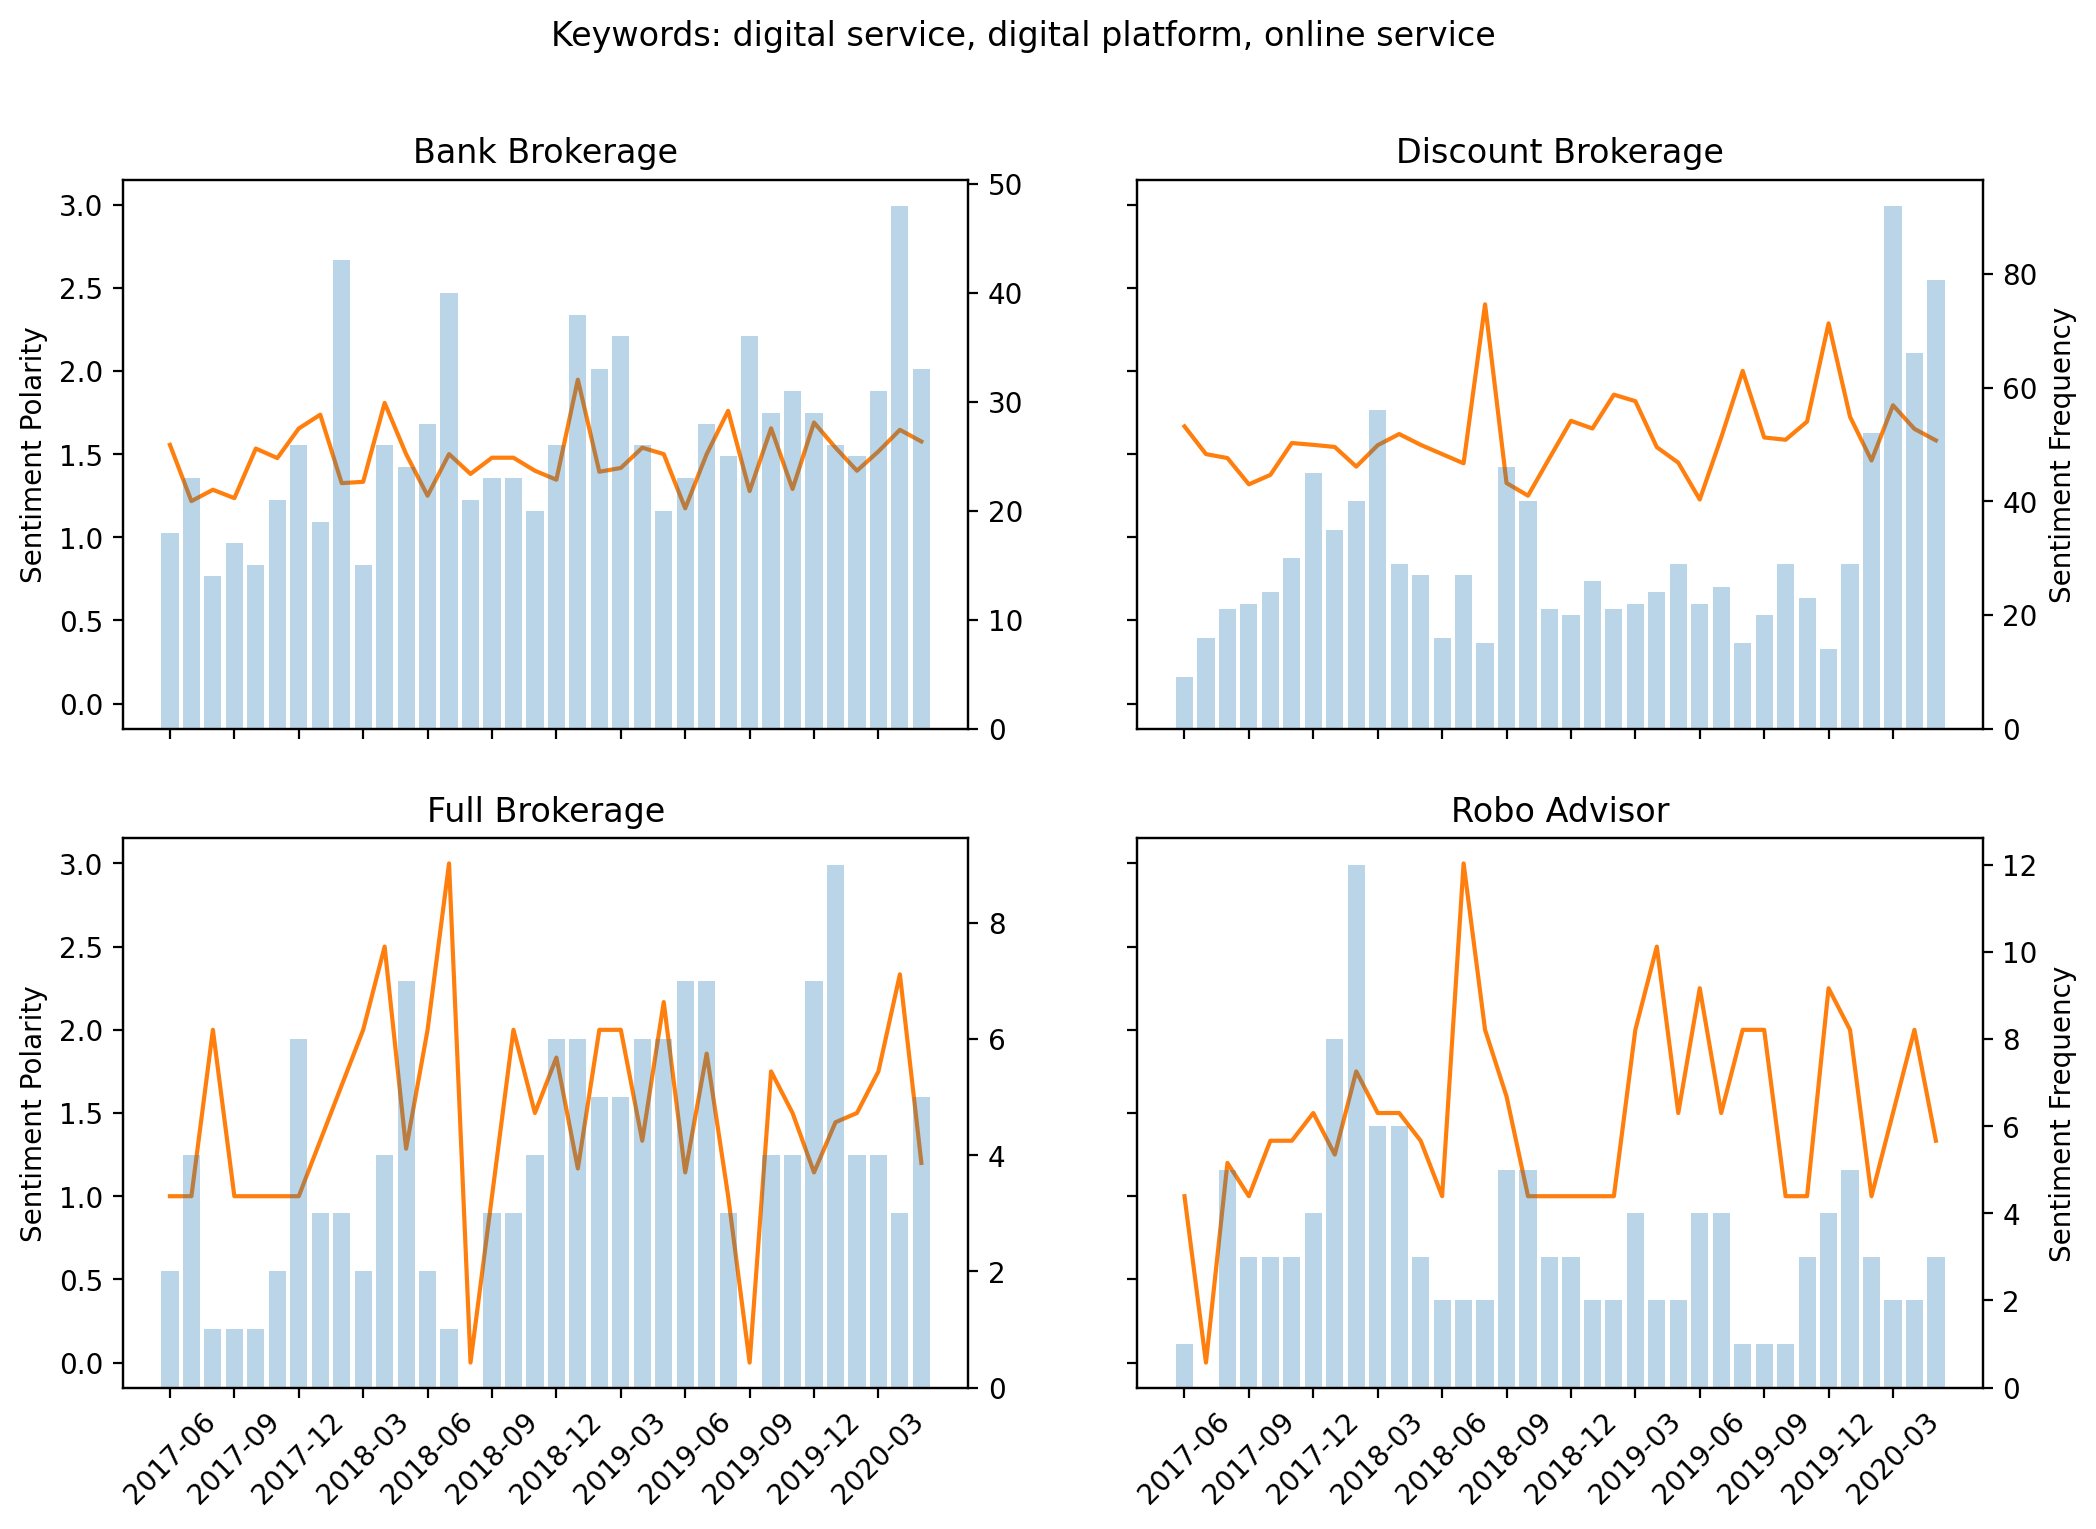

In [206]:
online=['digital service','digital platform','online service','mobile app','online account','self service','selfservice',
        'online experience']
all_trend(metadata,0,online)

In [205]:
text(search(metadata[2][0],['online experience']))

['MorganStanley Your online experience is HORRIBLE with a capital H you are holding my money hostage and I want it']